## Imports und Weissemodell

In [2]:
import modelbase
import modelbase.ratelaws as rl
from weisse import WeisseBaseModel, defaultParameters

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
import seaborn as sns
import pandas as pd
import qtb_plot


Could not load modelbase.assimulate. Sundials support disabled.


In [3]:
cl = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq']

# Verminderung des ns Werts systematisch 
## wertveränderung von 
- gammamax(1260), 
- vt(726)
-  raten

In [4]:
for i in range(400,8201,200):
    print(i)

400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200


In [4]:
qtb_plot.set("notebook")

In [60]:
s.getY()[:,16][-1]

0.03919282957510767

[0.01450109234294299,
 0.017684563865156017,
 0.020127006101380573,
 0.022121559430804575,
 0.02380577687144056,
 0.025255737527554032,
 0.026518823829034963,
 0.027627045344815943,
 0.028603275998209693,
 0.029464641755617742,
 0.030224668308950927,
 0.0308947971981203,
 0.031485425871709,
 0.032006452688073686,
 0.032467352995434684,
 0.032876958138618975,
 0.0332431770450213,
 0.033572827296550416,
 0.033871617265266135,
 0.03414423964995905,
 0.034394517932870496,
 0.03462556187190012,
 0.03483990863288203,
 0.035039641028292344,
 0.03522648238509639,
 0.0354018709588395,
 0.03556701770738802,
 0.03572295102708457,
 0.03587055146671969,
 0.036010578800790796,
 0.036143693287732294,
 0.03627047249227091,
 0.03639142470748655,
 0.03650699975368199,
 0.036617597738740765,
 0.03672357622200182,
 0.03682525611786881,
 0.036922926596659404,
 0.03701684918136507,
 0.03710726119475098,
 0.03719437867774935,
 0.037278398874582265,
 0.03735950236046559,
 0.0374378548726098,
 0.03751360889345

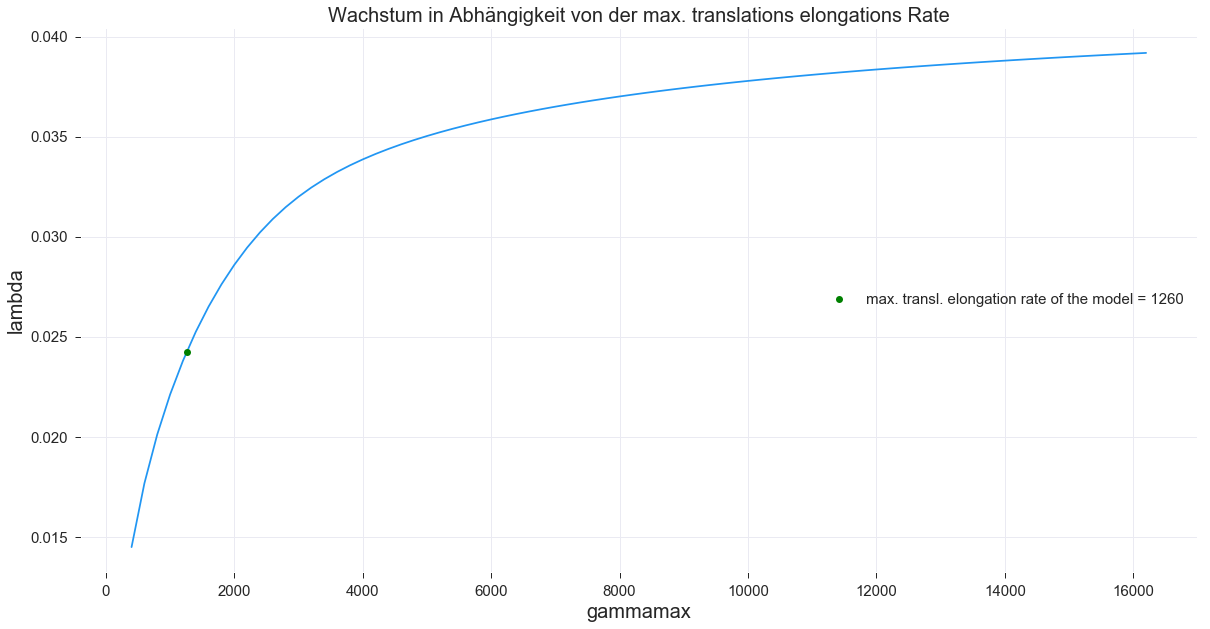

In [14]:
lambdawertgammamax = []

m= WeisseBaseModel()
s = modelbase.Simulator(m)

i = 1
gammamax = 400

while i <= 80:
    m.par.update({'gammamax': gammamax})
    #                         ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])  
    s.timeCourse(np.linspace(0,3000,100),weise_values)
    lambdawertgammamax.append(s.getY()[:,16][-1])
    
    i += 1
    gammamax += 200

    
xgammamax = range(400,16301,200)
y = lambdawertgammamax
plt.figure(figsize=(20,10))
plt.title('Wachstum in Abhängigkeit von der max. translations elongations Rate', size = 20)
plt.xlabel('gammamax', size = 20)
plt.ylabel('lambda', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)



modelgammamaxwert = []
mgammamax = WeisseBaseModel()
#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])

mgammamax.par.update({'gammamax': 1260})
sgammamax = modelbase.Simulator(mgammamax)
sgammamax.timeCourse(np.linspace(0,3000,100),weise_values);
modelgammamaxwert.append(sgammamax.getY()[:,16][-1])


plt.plot(xgammamax,y)
plt.plot(1260,modelgammamaxwert,'og', label ='max. transl. elongation rate of the model = 1260')
plt.legend(loc = 'center right', prop={'size': 15})


#letzter lambdawert bei unterschiedlichen gammamax
lambdawertgammamax


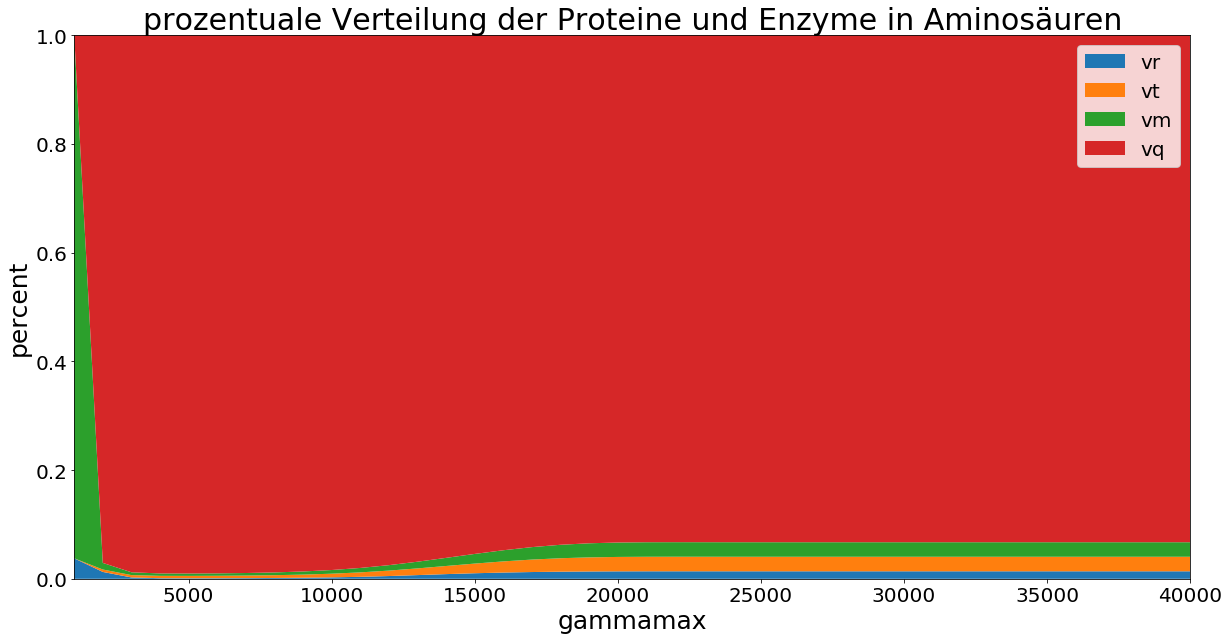

In [18]:
vr = s.getRate('vr').tolist()
vt = s.getRate('vt').tolist()
vm = s.getRate('vm').tolist()
vq = s.getRate('vq').tolist()

# Make data
data = pd.DataFrame({'group_A':vr[0:40], 'group_B':vt[0:40], 'group_C':vm[0:40], 'group_D':vq[0:40]}, index=xgammamax)
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(xgammamax,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'])
plt.legend(loc='upper right',prop={'size': 20})
plt.margins(0,0)
plt.title('prozentuale Verteilung der Proteine und Enzyme in Aminosäuren', size = 30)
plt.xlabel('gammamax', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

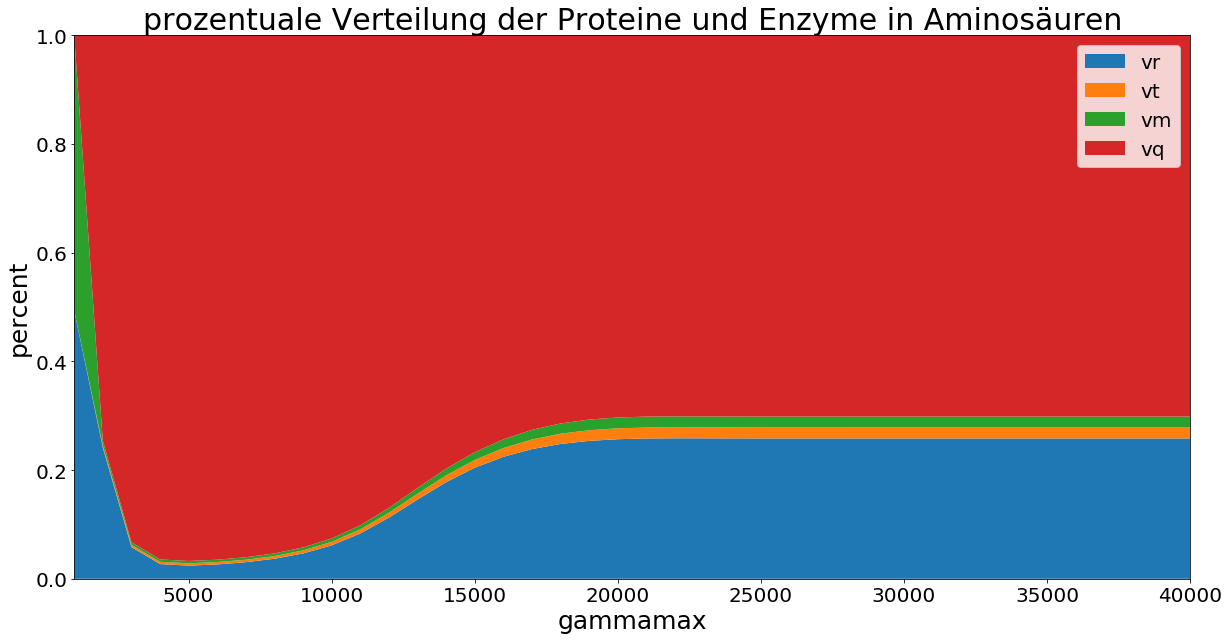

In [19]:
vramino, vtamino, vmamino, vqamino = [], [], [], []
for i , data in enumerate(vr):
    vramino.append(vr[i]* 7459)

for i , data in enumerate(vr):
    vtamino.append(vt[i]* 300)

for i , data in enumerate(vr):
    vmamino.append(vm[i]* 300)

for i , data in enumerate(vr):
    vqamino.append(vq[i]* 300)
    
    
# Make data
data = pd.DataFrame({'group_A':vramino[0:40], 'group_B':vtamino[0:40], 'group_C':vmamino[0:40], 'group_D':vqamino[0:40]}, index=xgammamax[0:40])
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(xgammamax,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'])
plt.legend(loc='upper right',prop={'size': 20})
plt.margins(0,0)
plt.title('prozentuale Verteilung der Proteine und Enzyme in Aminosäuren', size = 30)
plt.xlabel('gammamax', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

[0.0019941476801138185,
 0.008988563628996598,
 0.012515919607397185,
 0.01569134261595545,
 0.01858050257705432,
 0.021226338672696316,
 0.023661057610630736,
 0.02591060395419767,
 0.02799665884755177,
 0.02993768743892258,
 0.031749576848393045,
 0.03344607751025642,
 0.03503913759885299,
 0.03653917103907899,
 0.03795527904171836,
 0.03929543617067964,
 0.04056664786893881,
 0.041775084353967096,
 0.04292619467447956,
 0.044024804006870075,
 0.04507519675428561,
 0.0460811876059001,
 0.04704618238002057,
 0.047973230193945345,
 0.04886506826584287,
 0.049724160452511795,
 0.0505527304563958,
 0.05135279049113177,
 0.05212616607328233,
 0.05287451750536152,
 0.05359935852878724,
 0.05430207255256676,
 0.05498392680206854,
 0.055646084680453005,
 0.05628961659159203,
 0.056915509436391835,
 0.057524674963202654,
 0.05811795712658648,
 0.05869613858631851,
 0.059259946459521096,
 0.059810057422679384,
 0.060347102246566,
 0.0608716698353801,
 0.0613843108313704,
 0.06188554083758296,


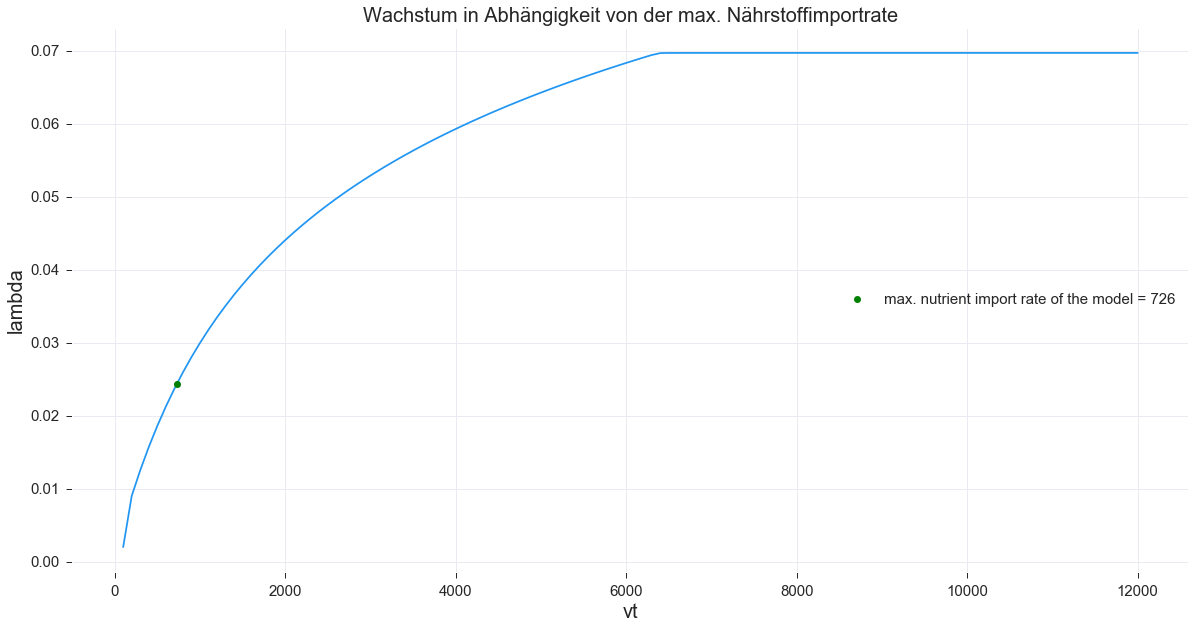

In [6]:
lambdawertvt = []

m= WeisseBaseModel()
s = modelbase.Simulator(m)

i = 1
vt = 100

while i <= 120:
    m.par.update({'vt': vt})
    #                         ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])  
    s.timeCourse(np.linspace(0,3000,100),weise_values)
    lambdawertvt.append(s.getY()[:,16][-1])
    
    i += 1
    vt += 100
    
    
modelvtwert = []
mvt = WeisseBaseModel()
#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])

mvt.par.update({'vt': 726})
svt = modelbase.Simulator(mvt)
svt.timeCourse(np.linspace(0,3000,100),weise_values);
modelvtwert.append(svt.getY()[:,16][-1])

    
xvt = range(100,12001,100)#[200,400,600,800,1000,1200,1400,1600]
y = lambdawertvt
plt.figure(figsize=(20,10))
plt.title('Wachstum in Abhängigkeit von der max. Nährstoffimportrate', size = 20)
plt.xlabel('vt', size = 20)
plt.ylabel('lambda', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.plot(xvt,y)
plt.plot(726,modelvtwert,'og', label ='max. nutrient import rate of the model = 726')
plt.legend(loc = 'center right', prop={'size': 15})

lambdawertvt


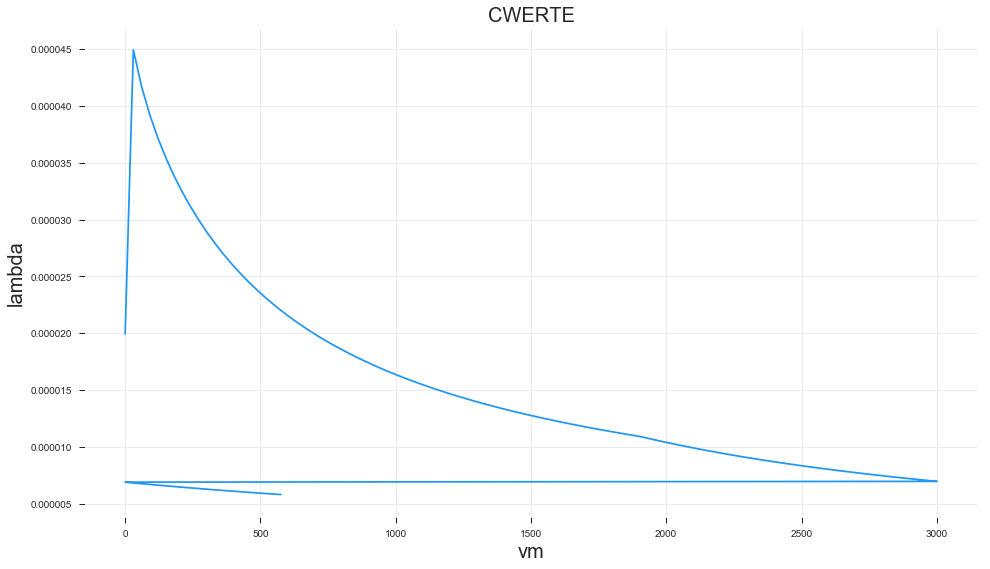

In [33]:
#xvt = range(500,8001,500)
y = lambdawertvt

Cwerte = []
for i, date in enumerate(xvt):
    Cwerte.append(y[i]/xvt[i])
    

plt.title('CWERTE', size = 20)
plt.xlabel('vm', size = 20)
plt.ylabel('lambda', size = 20)
#plt.xticks(size = 15)
#plt.yticks(size = 15)

plt.plot(s.getT()[:120],Cwerte)
#plt.plot(5800,modelvmwert,'og', label ='max. enzymatic rate \n of the model = 5800')
#plt.legend(loc = 'center right', prop={'size': 15})
#plt.legend(bbox_to_anchor=[1.1,1])


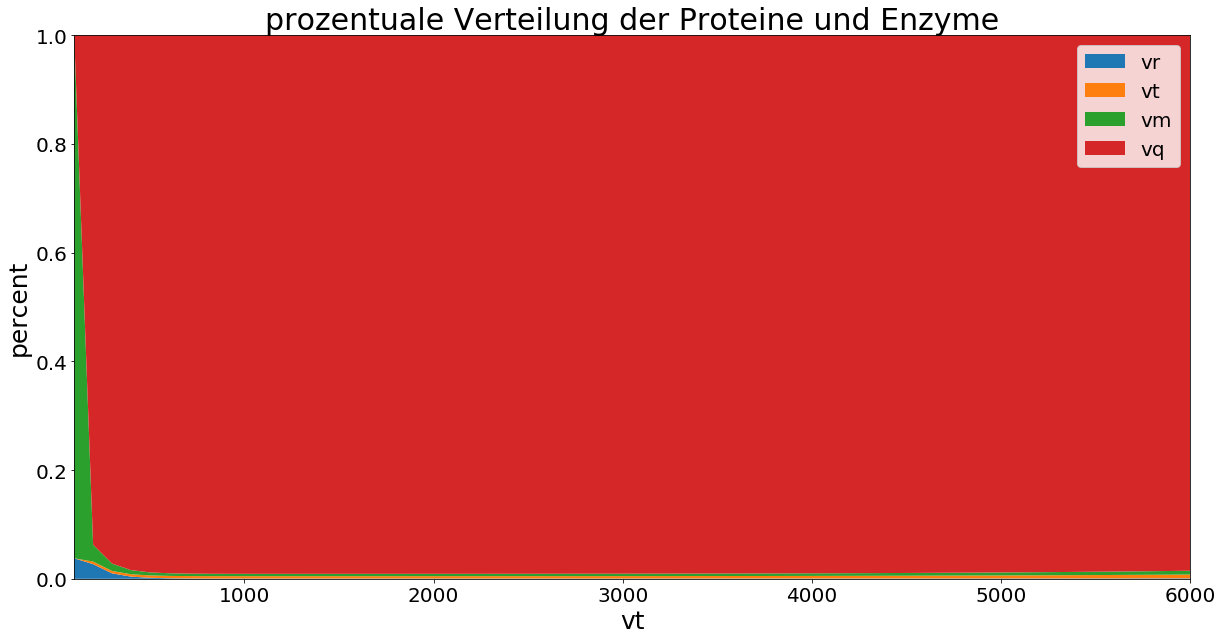

In [21]:
vr = s.getRate('vr').tolist()
vt = s.getRate('vt').tolist()
vm = s.getRate('vm').tolist()
vq = s.getRate('vq').tolist()

# Make data
data = pd.DataFrame({'group_A':vr[0:60], 'group_B':vt[0:60], 'group_C':vm[0:60], 'group_D':vq[0:60]}, index=xvt)
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(xvt,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'])
plt.legend(loc='upper right',prop={'size': 20})
plt.margins(0,0)
plt.title('prozentuale Verteilung der Proteine und Enzyme', size = 30)
plt.xlabel('vt', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

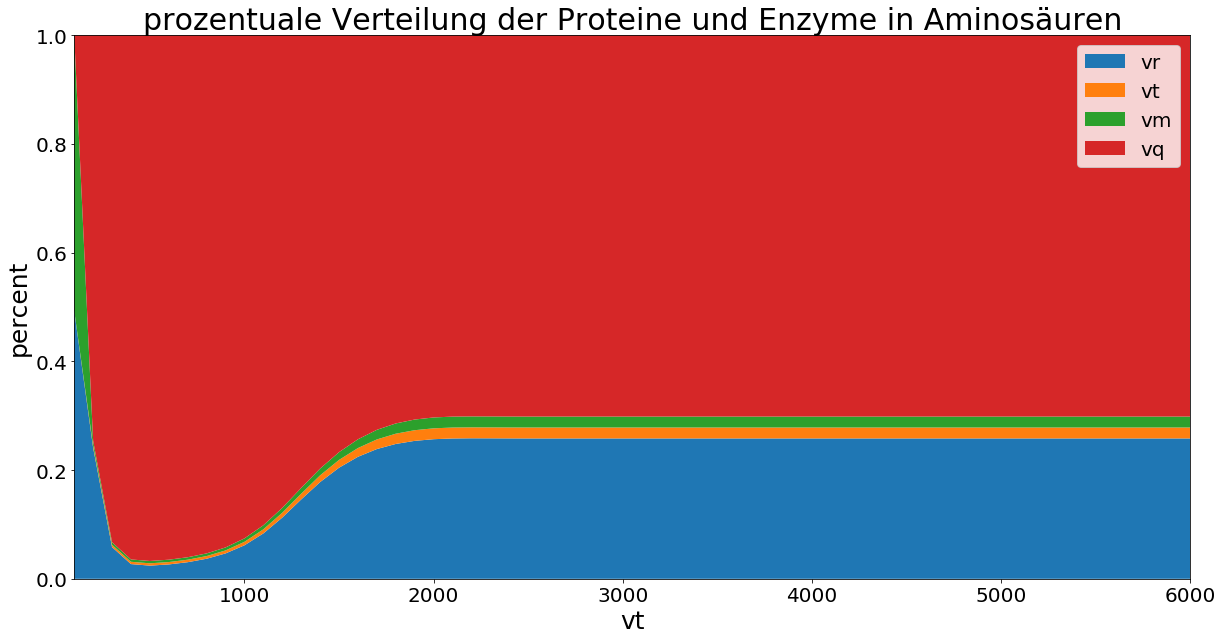

In [22]:
# Make data
data = pd.DataFrame({'group_A':vramino[0:60], 'group_B':vtamino[0:60], 'group_C':vmamino[0:60], 'group_D':vqamino[0:60]}, index=xvt)
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(xvt,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'])
plt.legend(loc='upper right',prop={'size': 20})
plt.margins(0,0)
plt.title('prozentuale Verteilung der Proteine und Enzyme in Aminosäuren', size = 30)
plt.xlabel('vt', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

In [3]:
qtb_plot.set("paper")

In [ ]:
def C(vm,x):
    # parameter den ich verändere
    oV = m.par.vm
    # wachstumswerte
    ov = s.getY()[:,16][-1]
    # um prozentzahl erhöhen oder erniedrigen
    d1V = oV*(1+(x*0.01))
    d2V = oV*(1-(x*0.01))
    
    def dv(vt):
        s1 = modelbase.Simulator(m)
        s1.model.par.update({'vm':d1V})
        s1.timeCourse(np.linspace(0,3000,100),weise_values)
        a = s1.getY()[:,16][-1]
        
        s2 = modelbase.Simulator(m)
        s2.model.par.update({'vm':d2V})
        s2.timeCourse(np.linspace(0,3000,100),weise_values)
        b = s2.getY()[:,16][-1]
        
        s1.model.par.update({'vm': oV})
        s2.model.par.update({'vm': oV})
        
        print(a)
        print(b)
        
        return a-b
    return (dv(vm)/ov)*(oV/(d1V-d2V))

16
16


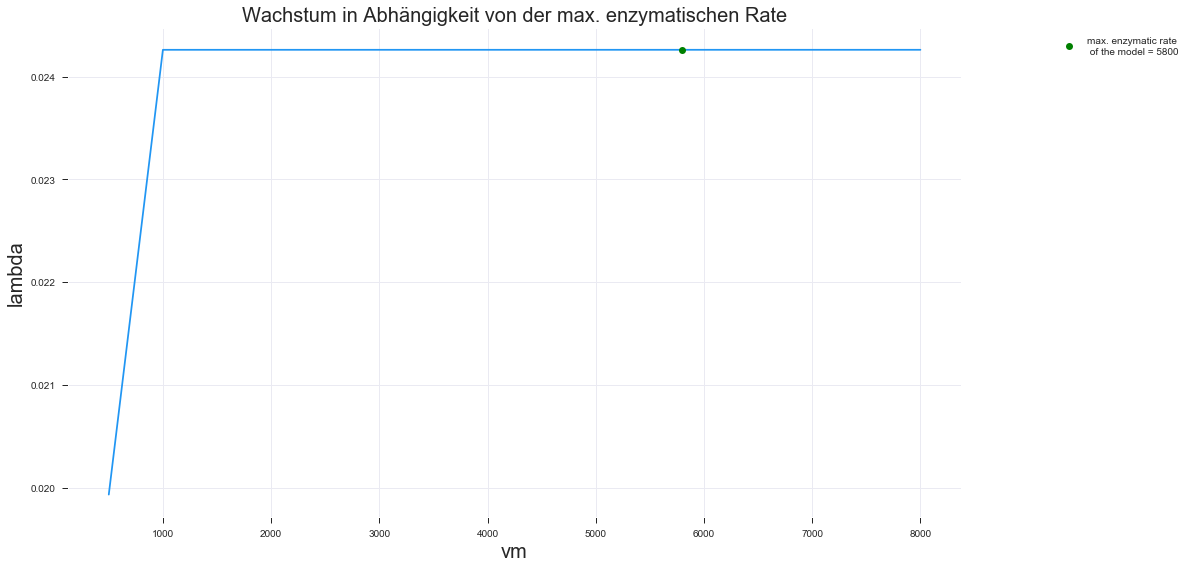

In [7]:
lambdawertvm = []

m= WeisseBaseModel()
s = modelbase.Simulator(m)

i = 1
vm = 500

while i <= 16:
    m.par.update({'vm': vm})
    #                         ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])  
    s.timeCourse(np.linspace(0,3000,100),weise_values)
    lambdawertvm.append(s.getY()[:,16][-1])
    
    i += 1
    vm += 500

    
modelvmwert = []
mvm = WeisseBaseModel()
#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])

mvm.par.update({'vm': 8500})
svm = modelbase.Simulator(mvm)
svm.timeCourse(np.linspace(0,3000,100),weise_values);
modelvmwert.append(svm.getY()[:,16][-1])


    
xvm = range(500,8001,500)
y = lambdawertvm
#plt.figure(figsize=(20,10))
plt.title('Wachstum in Abhängigkeit von der max. enzymatischen Rate', size = 20)
plt.xlabel('vm', size = 20)
plt.ylabel('lambda', size = 20)
#plt.xticks(size = 15)
#plt.yticks(size = 15)

plt.plot(xvm,y)
plt.plot(5800,modelvmwert,'og', label ='max. enzymatic rate \n of the model = 5800')
#plt.legend(loc = 'center right', prop={'size': 15})
plt.legend(bbox_to_anchor=[1.1,1])

print(len(lambdawertvm))
print(len(xvm))


No handles with labels found to put in legend.


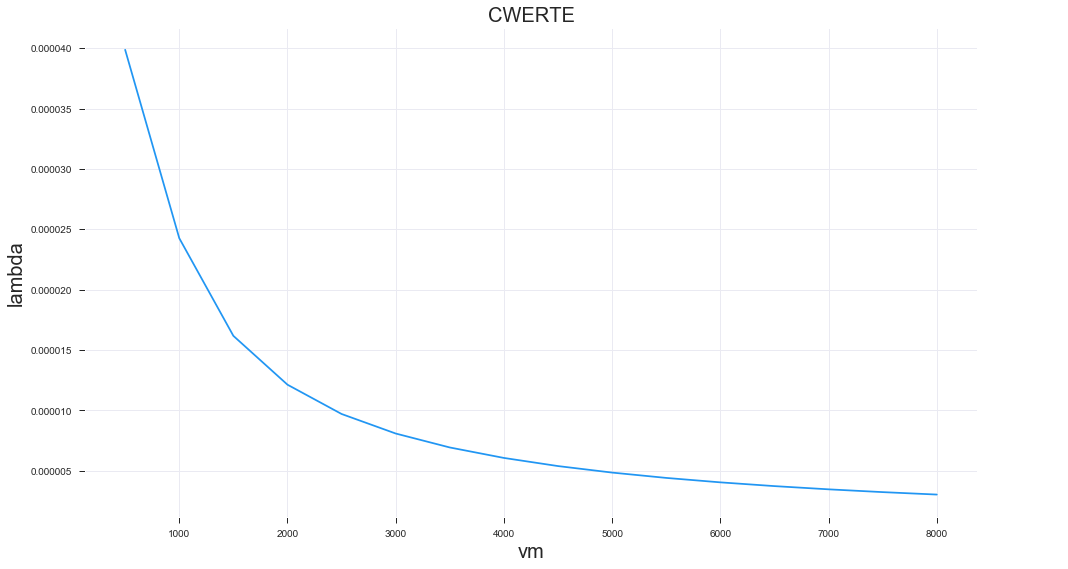

In [26]:
xvm = range(500,8001,500)
y = lambdawertvm

Cwerte = []
for i, date in enumerate(xvm):
    Cwerte.append(y[i]/xvm[i])
    

plt.title('CWERTE', size = 20)
plt.xlabel('vm', size = 20)
plt.ylabel('lambda', size = 20)
#plt.xticks(size = 15)
#plt.yticks(size = 15)

plt.plot(xvm,Cwerte)
#plt.plot(5800,modelvmwert,'og', label ='max. enzymatic rate \n of the model = 5800')
#plt.legend(loc = 'center right', prop={'size': 15})
plt.legend(bbox_to_anchor=[1.1,1])


In [27]:
Cwerte

[3.986284362992839e-05,
 2.426266203563834e-05,
 1.6175172079991254e-05,
 1.2131391250234626e-05,
 9.705117452307672e-06,
 8.087600001516587e-06,
 6.932229752585218e-06,
 6.065701756793222e-06,
 5.391735370418023e-06,
 4.852562162713972e-06,
 4.411420385460758e-06,
 4.043802196973757e-06,
 3.73274062489764e-06,
 3.4661164004324124e-06,
 3.2350420581143654e-06,
 3.0328519978090004e-06]

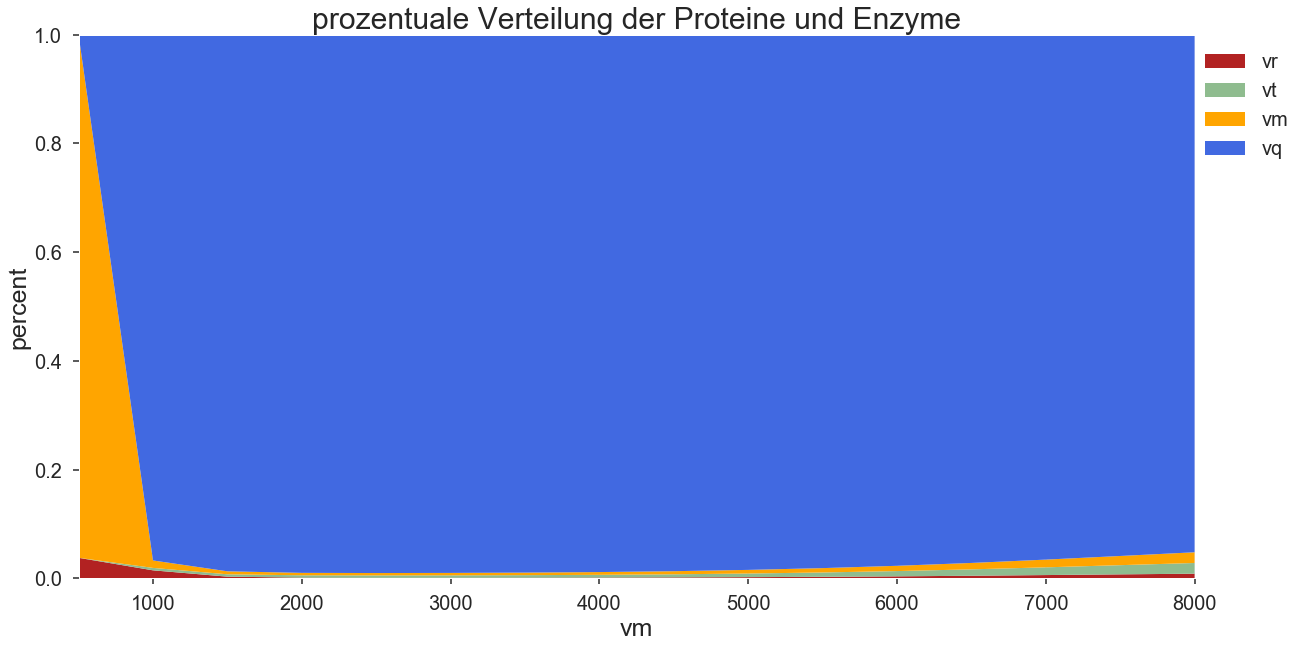

In [18]:
vr = s.getRate('vr').tolist()
vt = s.getRate('vt').tolist()
vm = s.getRate('vm').tolist()
vq = s.getRate('vq').tolist()

# Make data
data = pd.DataFrame({'group_A':vr[0:16], 'group_B':vt[0:16], 'group_C':vm[0:16], 'group_D':vq[0:16]}, index=xvm[0:16])
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(xvm,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'], colors = ['firebrick','darkseagreen','orange','royalblue'])
#plt.legend(loc='upper right',prop={'size': 20})
plt.legend(prop={'size': 20}, bbox_to_anchor=[1.1,1])
plt.margins(0,0)
plt.title('prozentuale Verteilung der Proteine und Enzyme', size = 30)
plt.xlabel('vm', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

In [7]:
# Make data
data = pd.DataFrame({'group_A':vramino[0:40], 'group_B':vtamino[0:40], 'group_C':vmamino[0:40], 'group_D':vqamino[0:40]}, index=xvm[0:40])
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(xvm,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'])
plt.legend(loc='upper right',prop={'size': 20})
plt.margins(0,0)
plt.title('prozentuale Verteilung der Proteine und Enzyme in Aminosäuren', size = 30)
plt.xlabel('vm', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

NameError: name 'vramino' is not defined

[0.03012018379928103,
 0.02908573207246776,
 0.028192242812479194,
 0.02740299407628346,
 0.026694561928016624,
 0.02605096329823317,
 0.02546073938778062,
 0.024915357559594363,
 0.024408270412685847,
 0.023934329820136005,
 0.023489405190267754,
 0.023070125378212444,
 0.022673698690084395,
 0.02229778398951043,
 0.021940396273506177,
 0.021599836115415223,
 0.021274636016040026,
 0.020963518976897348,
 0.02066536606778488,
 0.020379190720059087,
 0.02010411812215287,
 0.01983936853647396,
 0.01958424366601329,
 0.0193381154185331,
 0.01910041657442543,
 0.018870632979927214,
 0.018648296972898288,
 0.018432981812368698,
 0.018224296931476536,
 0.018021883870407658,
 0.017825412774467416,
 0.01763457936459756,
 0.017449102305046787,
 0.017268720906639473,
 0.01709319311502218,
 0.016922293742020082,
 0.016755812905299938,
 0.016593554647248474,
 0.016435335708650075,
 0.016280984436569907,
 0.016130339808997776,
 0.01598325056142079,
 0.0158395744026598,
 0.015699177309120335,
 0.015

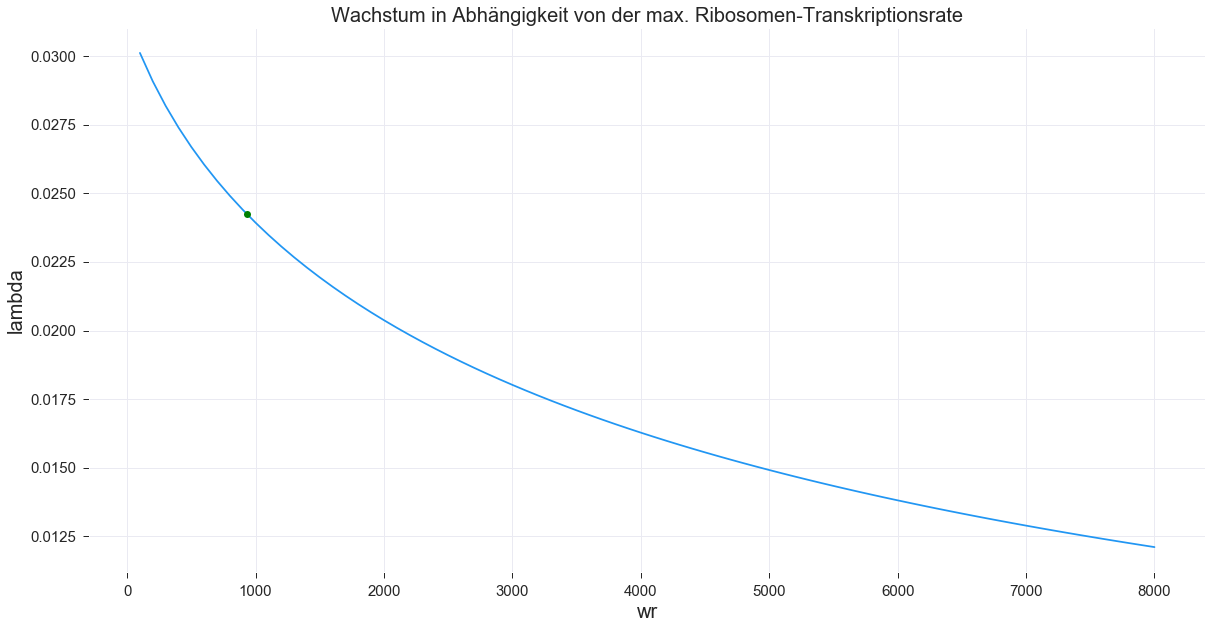

In [8]:
lambdawertwr = []
omegarwert =[]
valuesOneHundredTimeSteps = []

m= WeisseBaseModel()
s = modelbase.Simulator(m)

i = 1
wr = 100

while i <= 80:
    m.par.update({'wr': wr})
    #                         ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])  
    changedValuesOverTimeArray = s.timeCourse(np.linspace(0,3000,100),weise_values);
    valuesOneHundredTimeSteps.append(changedValuesOverTimeArray)
    lambdawertwr.append(s.getY()[:,16][-1])
    omegarwert.append(s.getRate('omegar')[-1])
    
    i += 1
    wr += 100
    
modelwrwert = []
mwr = WeisseBaseModel()
#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])

mwr.par.update({'wr': 930})
swr = modelbase.Simulator(mwr)
swr.timeCourse(np.linspace(0,3000,100),weise_values);
modelwrwert.append(svt.getY()[:,16][-1])


xwr = range(100,8001,100)#[200,400,600,800,1000,1200,1400,1600]
y = lambdawertwr
plt.figure(figsize=(20,10))
plt.title('Wachstum in Abhängigkeit von der max. Ribosomen-Transkriptionsrate', size = 20)
plt.xlabel('wr', size = 20)
plt.ylabel('lambda', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.plot(xwr,y)
plt.plot(930,modelwrwert,'og', label ='max. ribosome transcription rate of the model = 930')

lambdawertwr


In [ ]:
pr, pt, pm, pq = [], [], [], []
for i, data in enumerate(valuesOneHundredTimeSteps):
    pr.append(valuesOneHundredTimeSteps[i][:,10][-1])
for i, data in enumerate(valuesOneHundredTimeSteps):
    pt.append(valuesOneHundredTimeSteps[i][:,11][-1])
for i, data in enumerate(valuesOneHundredTimeSteps):
    pm.append(valuesOneHundredTimeSteps[i][:,12][-1])
for i, data in enumerate(valuesOneHundredTimeSteps):
    pq.append(valuesOneHundredTimeSteps[i][:,13][-1])

ValueError: operands could not be broadcast together with shapes (80,) (20,) 

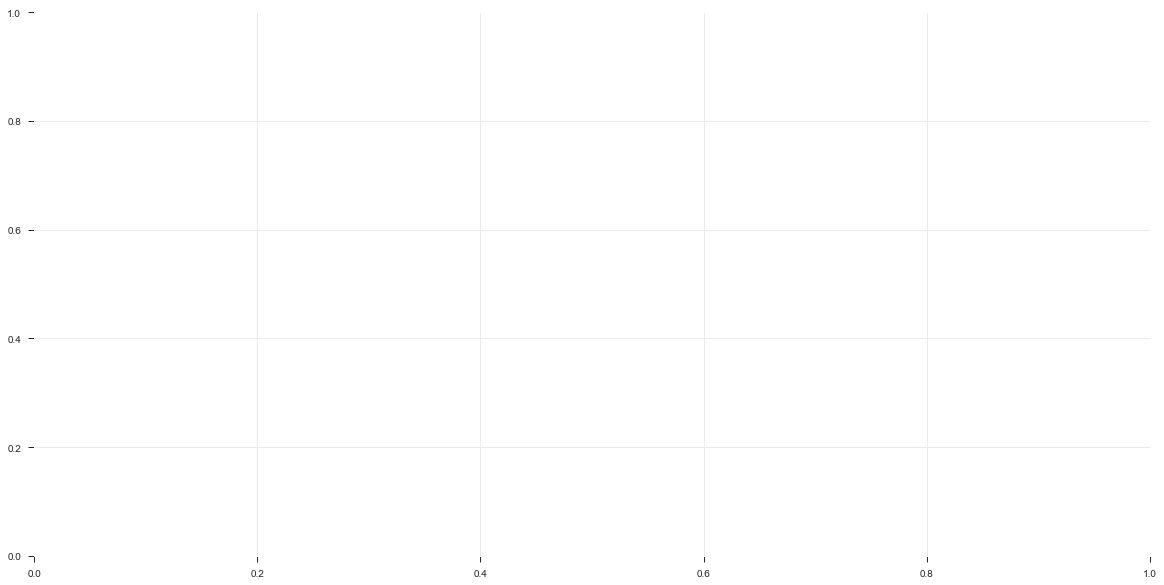

In [55]:
# Make data
data = pd.DataFrame({'group_A':pr[0:20], 'group_B':pt[0:20], 'group_C':pm[0:20], 'group_D':pq[0:20]}, index=xwr[0:20])
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(xwr,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'])
plt.legend(loc='upper right',prop={'size': 20})
plt.margins(0,0)
plt.title('prozentuale Verteilung der Proteine und Enzyme', size = 30)
plt.xlabel('wr', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

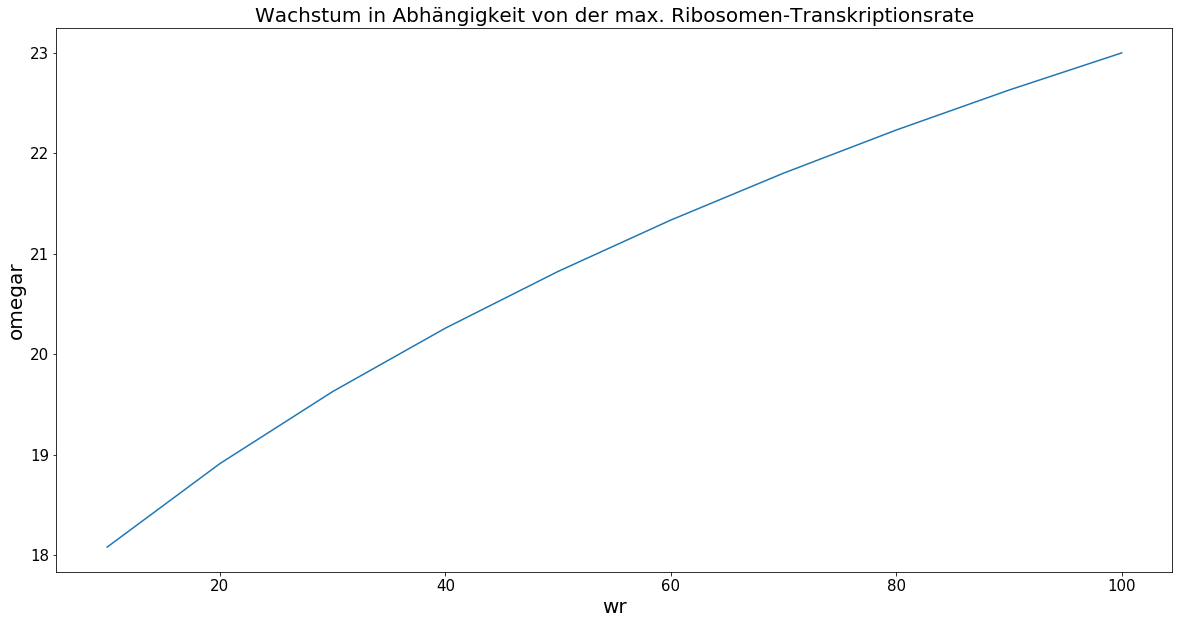

In [126]:
xwro = range(10,101,10)
y = omegarwert
plt.figure(figsize=(20,10))
plt.title('Wachstum in Abhängigkeit von der max. Ribosomen-Transkriptionsrate', size = 20)
plt.xlabel('wr', size = 20)
plt.ylabel('omegar', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.plot(xwro,y)



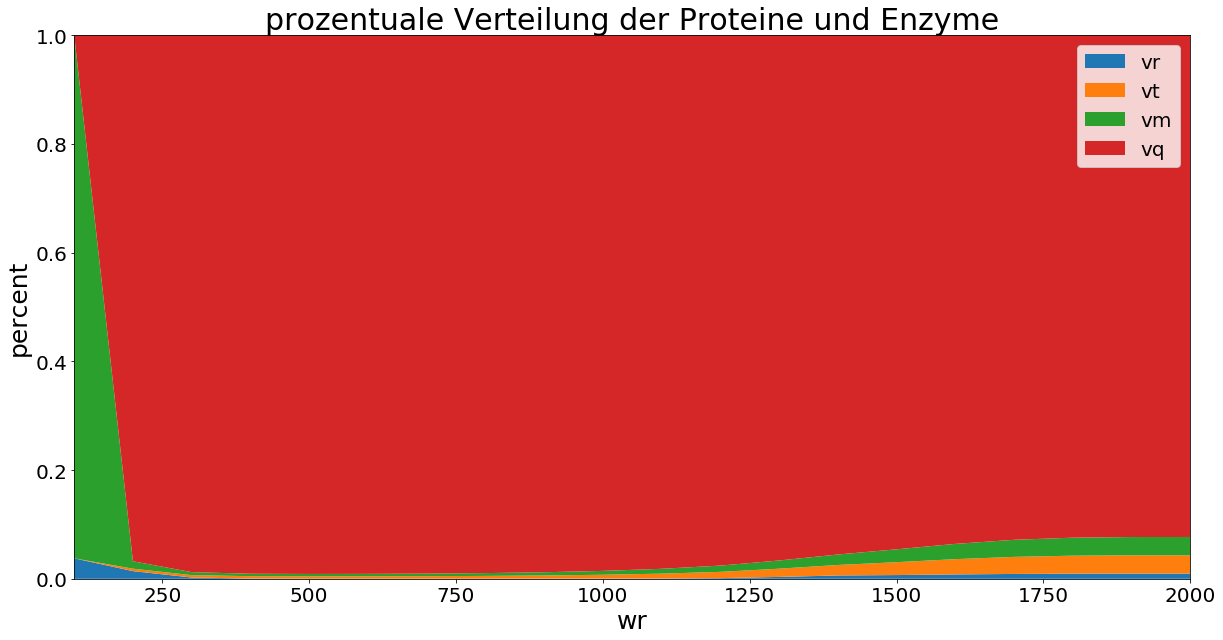

In [29]:
vr = s.getRate('vr').tolist()
vt = s.getRate('vt').tolist()
vm = s.getRate('vm').tolist()
vq = s.getRate('vq').tolist()


# Make data
data = pd.DataFrame({'group_A':vr[0:20], 'group_B':vt[0:20], 'group_C':vm[0:20], 'group_D':vq[0:20]}, index=xwr)
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(xwr,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'])
plt.legend(loc='upper right',prop={'size': 20})
plt.margins(0,0)
plt.title('prozentuale Verteilung der Proteine und Enzyme', size = 30)
plt.xlabel('wr', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

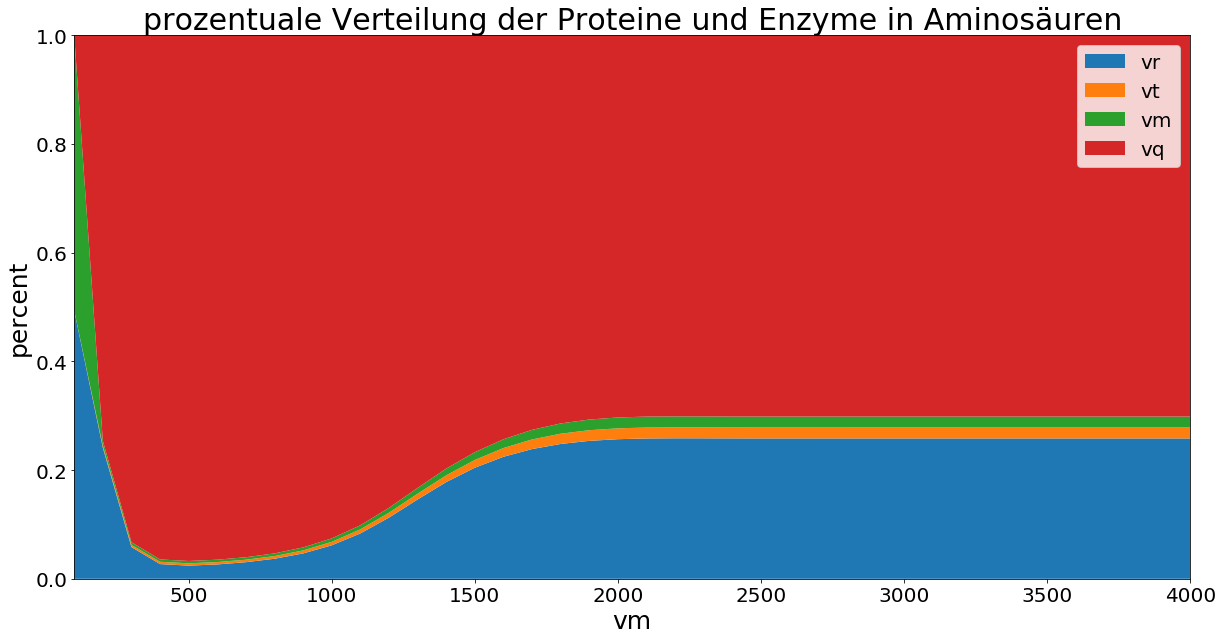

In [61]:
# Make data
data = pd.DataFrame({'group_A':vramino[0:40], 'group_B':vtamino[0:40], 'group_C':vmamino[0:40], 'group_D':vqamino[0:40]}, index=xwr[0:40])
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(xwr,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'])
plt.legend(loc='upper right',prop={'size': 20})
plt.margins(0,0)
plt.title('prozentuale Verteilung der Proteine und Enzyme in Aminosäuren', size = 30)
plt.xlabel('vm', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

[0.008656723957345909,
 0.014787015320120474,
 0.019685044045423393,
 0.023746892981393933,
 0.0271977971204181,
 0.03018459797326495,
 0.03280888257713833,
 0.03514357650601113,
 0.037242520158296454,
 0.03914640170178208,
 0.040886596229538184,
 0.042487730199259,
 0.043969439332883435,
 0.04534760094937919,
 0.04663521529879206,
 0.04784304737227918,
 0.04898010205252256,
 0.050053981226931374,
 0.051071155924404914,
 0.05203717634683996,
 0.05295683587233247,
 0.05383430049987814,
 0.054673212031614446,
 0.05547677106927474,
 0.05624780432653809,
 0.05698881962369759,
 0.057702051096377105,
 0.058389496515357464,
 0.059052948094160576,
 0.05969401764806689,
 0.06031415623908783,
 0.060914666796860154,
 0.061496702754875135,
 0.06206122039125381,
 0.06260866477360814,
 0.06313390247536409,
 0.0632281496107601,
 0.06305607399673127,
 0.06288166945375923,
 0.06270774466574934,
 0.06253467969397386,
 0.062362578919634565,
 0.06219147890214584,
 0.062021392822029765,
 0.0618523240242348

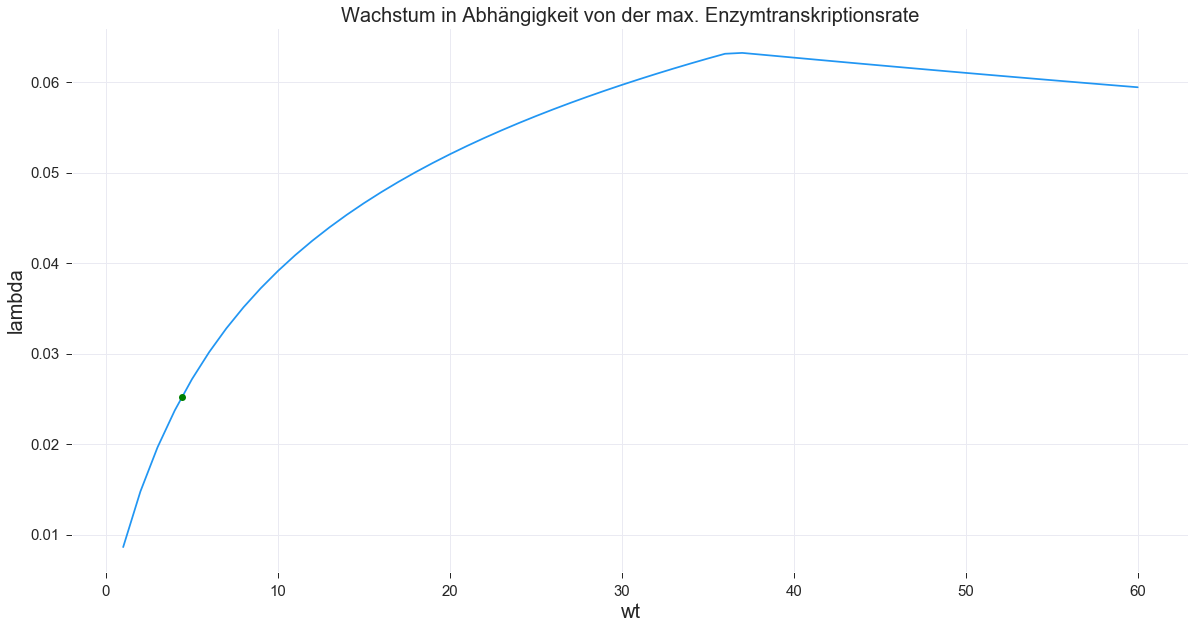

In [9]:
lambdawertwt = []

m= WeisseBaseModel()
s = modelbase.Simulator(m)

i = 1
wt = 1

while i <= 60:
    m.par.update({'wt': wt})
    #                         ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])  
    s.timeCourse(np.linspace(0,3000,100),weise_values)
    lambdawertwt.append(s.getY()[:,16][-1])
    
    i += 1
    wt += 1

    
    
modelwtwert = []
mwt = WeisseBaseModel()
#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])

mwt.par.update({'wt': 4.41})
swt = modelbase.Simulator(mwt)
swt.timeCourse(np.linspace(0,3000,100),weise_values);
modelwtwert.append(swt.getY()[:,16][-1])
    

xwt = range(1,61,1)
y = lambdawertwt
plt.figure(figsize=(20,10))
plt.title('Wachstum in Abhängigkeit von der max. Enzymtranskriptionsrate', size = 20)
plt.xlabel('wt', size = 20)
plt.ylabel('lambda', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.plot(xwt,y)
plt.plot(4.41,modelwtwert,'og', label ='max. enzyme transcription rate of the model = 4.41')


lambdawertwt


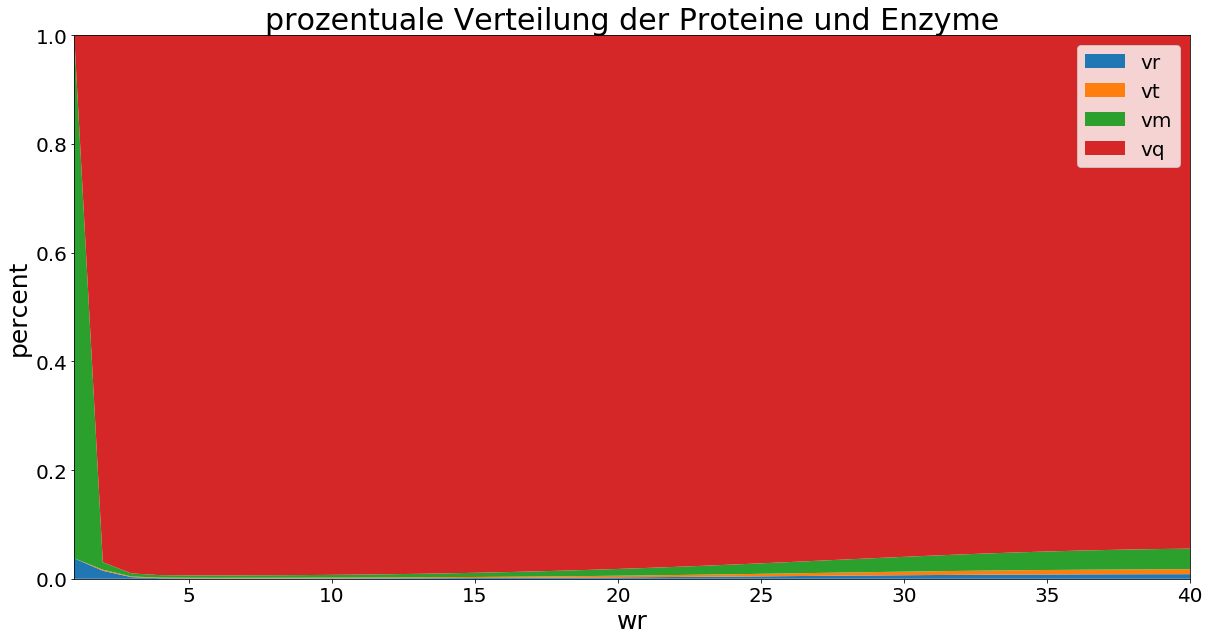

In [32]:
vr = s.getRate('vr').tolist()
vt = s.getRate('vt').tolist()
vm = s.getRate('vm').tolist()
vq = s.getRate('vq').tolist()

# Make data
data = pd.DataFrame({'group_A':vr[0:40], 'group_B':vt[0:40], 'group_C':vm[0:40], 'group_D':vq[0:40]}, index=xwt)
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(xwt,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'])
plt.legend(loc='upper right',prop={'size': 20})
plt.margins(0,0)
plt.title('prozentuale Verteilung der Proteine und Enzyme', size = 30)
plt.xlabel('wr', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

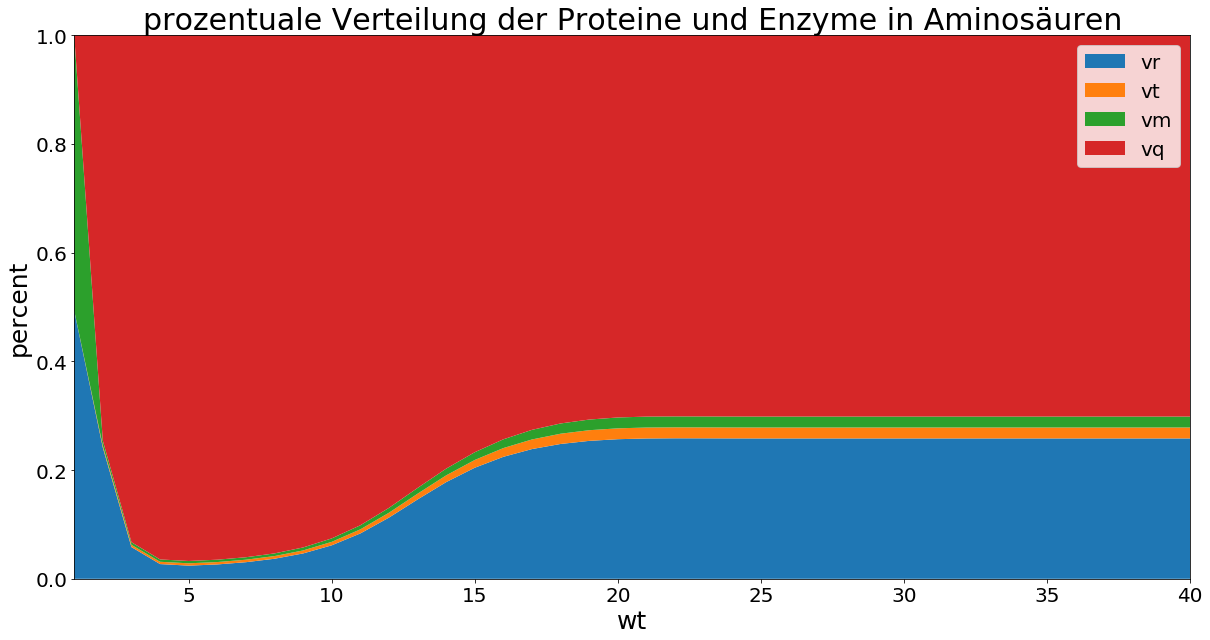

In [33]:
# Make data
data = pd.DataFrame({'group_A':vramino[0:40], 'group_B':vtamino[0:40], 'group_C':vmamino[0:40], 'group_D':vqamino[0:40]}, index=xwt[0:40])
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(xwt,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'])
plt.legend(loc='upper right',prop={'size': 20})
plt.margins(0,0)
plt.title('prozentuale Verteilung der Proteine und Enzyme in Aminosäuren', size = 30)
plt.xlabel('wt', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

[0.03417517677740487,
 0.03319287504916262,
 0.032415037561371665,
 0.03167797601249128,
 0.03082138215393592,
 0.02948206523146622,
 0.027800183257914224,
 0.02623548006969471,
 0.024866782472346947,
 0.023673323269076302,
 0.02262552674074145,
 0.0216978223994601,
 0.020869686509174364,
 0.020124849283102736,
 0.01945036743617764,
 0.01883585775118031,
 0.01827290988041349,
 0.01775464491882786,
 0.017275383819426646,
 0.01683039681494411,
 0.016415712415349486,
 0.016027970427653818,
 0.015664307761256074,
 0.015322268872720863,
 0.014999734902971544,
 0.014694867128089855,
 0.014406061470082748,
 0.014131911627765028,
 0.013871178981579472,
 0.013622767863221948,
 0.01338570510551376,
 0.013159123031122509,
 0.012942245222426403,
 0.012734374554695867,
 0.01253488308211121,
 0.012343203449110171,
 0.01215882156414967,
 0.011981270323578487,
 0.011810124213229991,
 0.011644994647009365,
 0.011485525927012265,
 0.011331391729993154,
 0.011182292041340643,
 0.011037950470978337,
 0.01

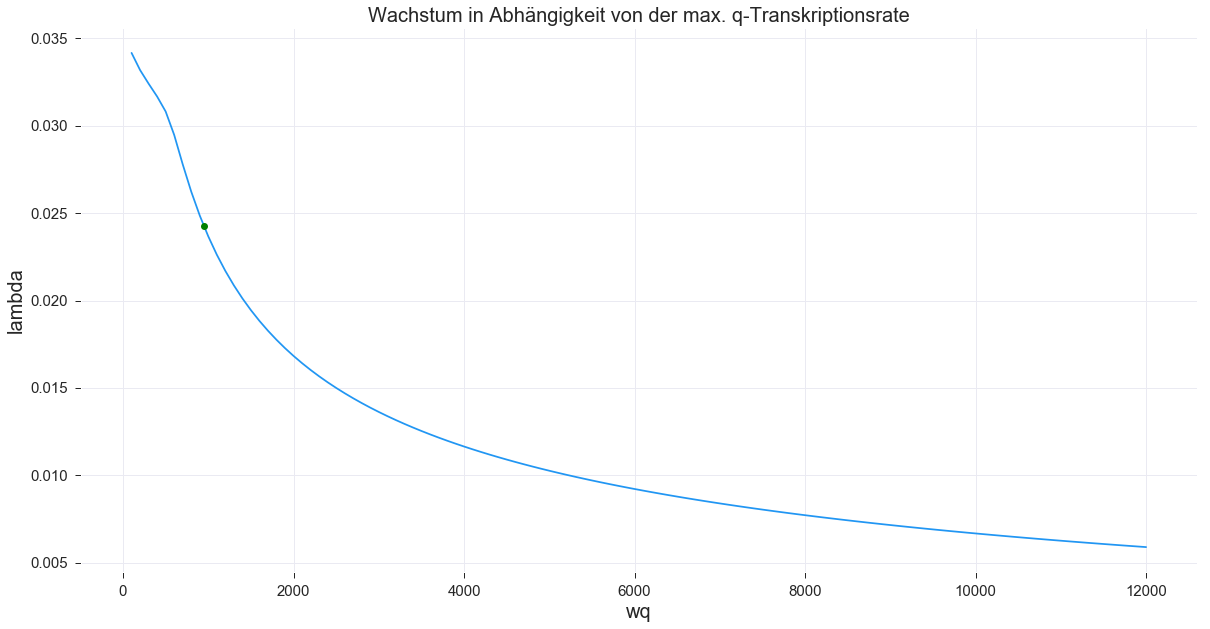

In [10]:
lambdawertwq = []

m= WeisseBaseModel()
s = modelbase.Simulator(m)

i = 1
wq = 100

while i <= 120:
    m.par.update({'wq': wq})
    #                         ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])  
    s.timeCourse(np.linspace(0,3000,100),weise_values)
    lambdawertwq.append(s.getY()[:,16][-1])
    
    i += 1
    wq += 100

    
    
modelwqwert = []
mwq = WeisseBaseModel()
#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])

mwq.par.update({'wq': 948.93})
swq = modelbase.Simulator(mwq)
swq.timeCourse(np.linspace(0,3000,100),weise_values);
modelwqwert.append(swq.getY()[:,16][-1])  

    
    
xwq = range(100,12001,100)#[200,400,600,800,1000,1200,1400,1600]
y = lambdawertwq
plt.figure(figsize=(20,10))
plt.title('Wachstum in Abhängigkeit von der max. q-Transkriptionsrate', size = 20)
plt.xlabel('wq', size = 20)
plt.ylabel('lambda', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.plot(xwq,y)
plt.plot(948.93,modelwqwert,'og', label ='max. q-transcription rate of the model = 948.93')

lambdawertwq

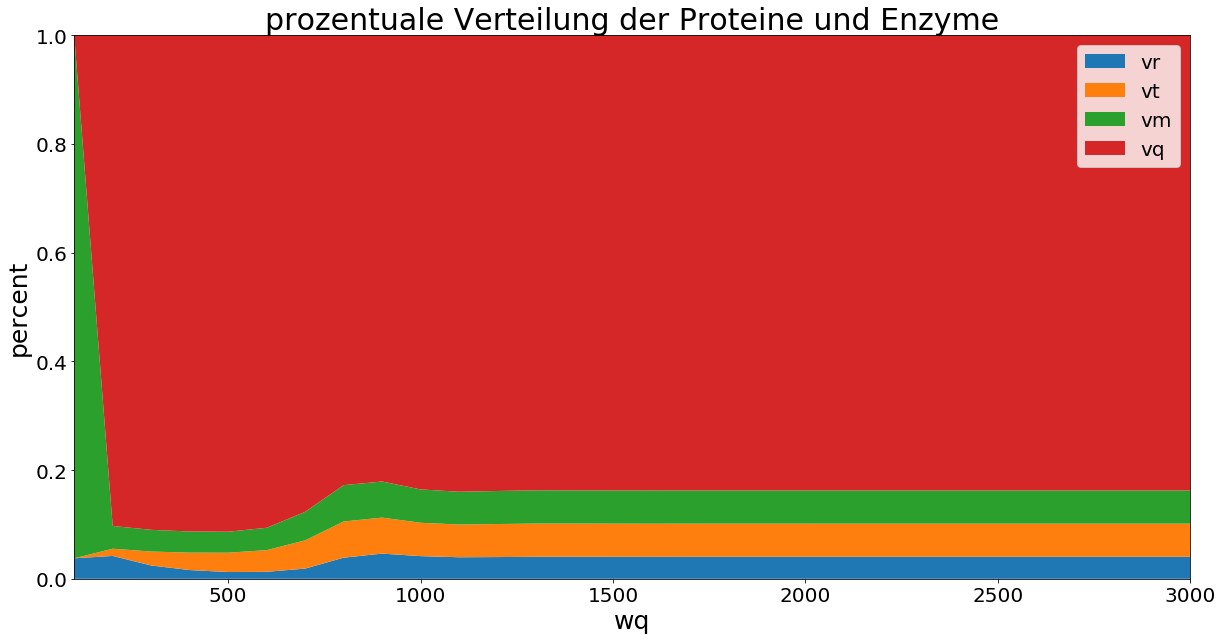

In [35]:
vr = s.getRate('vr').tolist()
vt = s.getRate('vt').tolist()
vm = s.getRate('vm').tolist()
vq = s.getRate('vq').tolist()

# Make data
data = pd.DataFrame({'group_A':vr[0:30], 'group_B':vt[0:30], 'group_C':vm[0:30], 'group_D':vq[0:30]}, index=xwq[0:30])
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(xwq,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'])
plt.legend(loc='upper right',prop={'size': 20})
plt.margins(0,0)
plt.title('prozentuale Verteilung der Proteine und Enzyme', size = 30)
plt.xlabel('wq', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

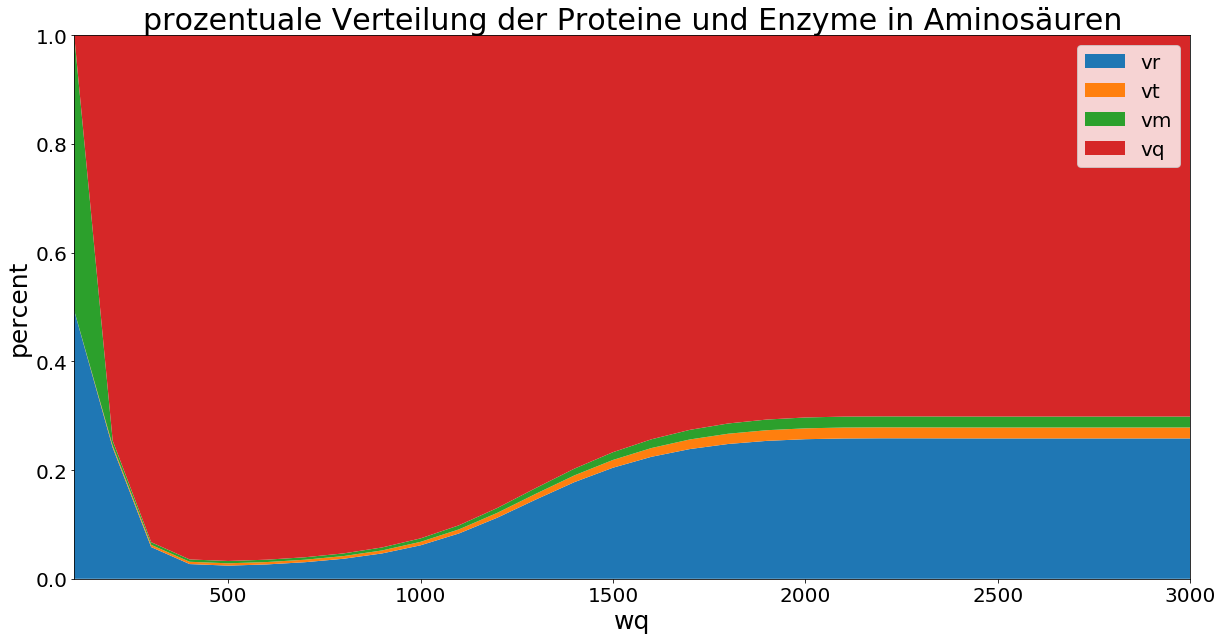

In [36]:
# Make data
data = pd.DataFrame({'group_A':vramino[0:30], 'group_B':vtamino[0:30], 'group_C':vmamino[0:30], 'group_D':vqamino[0:30]}, index=xwq[0:30])
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(xwq,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'])
plt.legend(loc='upper right',prop={'size': 20})
plt.margins(0,0)
plt.title('prozentuale Verteilung der Proteine und Enzyme in Aminosäuren', size = 30)
plt.xlabel('wq', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

[0.02294680534514702,
 0.023541696902480414,
 0.02378022242228639,
 0.02391037965380311,
 0.023992669131002828,
 0.024049489943873233,
 0.024091116089980807,
 0.024122938473542254,
 0.02414806274391547,
 0.024168405970597277,
 0.024185216336563058,
 0.024199341794271585,
 0.024211378741076418,
 0.024221758946471973,
 0.02423080273550998,
 0.02423875279184564,
 0.02424579635301332,
 0.024252080199142743,
 0.024257721026232325,
 0.02426281278190846,
 0.02426743195352389,
 0.02427164144605148,
 0.024275493470011452,
 0.024279031722344243,
 0.02428229305433721,
 0.024285308762091222,
 0.02428810559559219,
 0.024290706555480837,
 0.024293131527882268,
 0.02429539779444349,
 0.024297520445297063,
 0.02429951271584949,
 0.02430138626329944,
 0.024303151395108517,
 0.02430481725889224,
 0.024306392001123955,
 0.02430788290046998,
 0.024309296480364933,
 0.02431063860450296,
 0.02431191455819561,
 0.024313129117978494,
 0.0243142866114004,
 0.024315390968573936,
 0.024316445766781807,
 0.024317

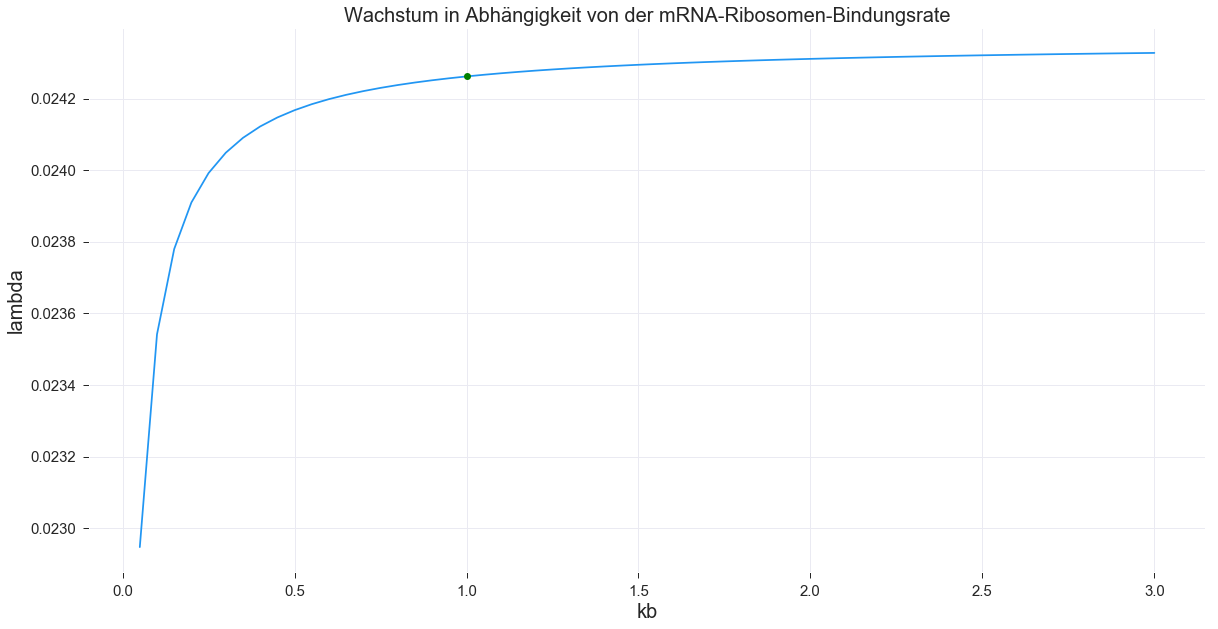

In [11]:
lambdawertkb = []

m= WeisseBaseModel()
s = modelbase.Simulator(m)

i = 1
kb = 0.05

while i <= 60:
    m.par.update({'kb': kb})
    #                         ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])  
    s.timeCourse(np.linspace(0,3000,100),weise_values)
    lambdawertkb.append(s.getY()[:,16][-1])
    
    i += 1
    kb += 0.05
    
    
    
modelkbwert = []
mkb = WeisseBaseModel()
#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])

mkb.par.update({'kb': 1})
skb = modelbase.Simulator(mkb)
skb.timeCourse(np.linspace(0,3000,100),weise_values);
modelkbwert.append(skb.getY()[:,16][-1])  


    
xkb = np.linspace(0.05,3,60)
y = lambdawertkb
plt.figure(figsize=(20,10))
plt.title('Wachstum in Abhängigkeit von der mRNA-Ribosomen-Bindungsrate', size = 20)
plt.xlabel('kb', size = 20)
plt.ylabel('lambda', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.plot(xkb,y)
plt.plot(1,modelkbwert,'og', label ='mRNA-ribosome binding rate in the model = 1')

lambdawertkb

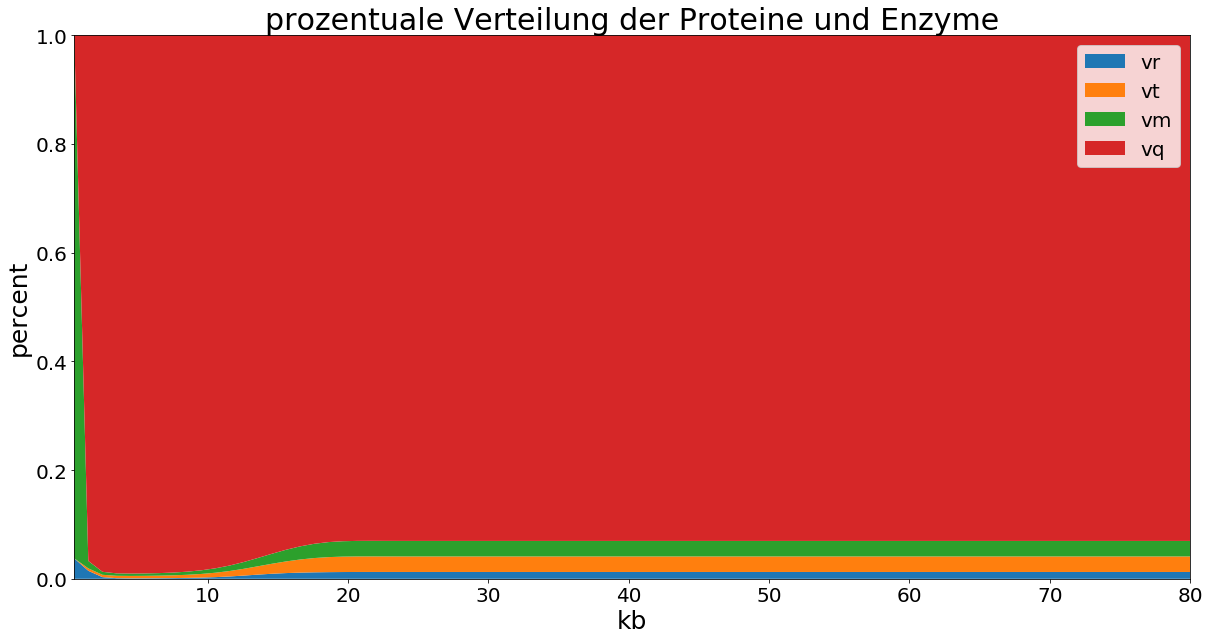

In [39]:
vr = s.getRate('vr').tolist()
vt = s.getRate('vt').tolist()
vm = s.getRate('vm').tolist()
vq = s.getRate('vq').tolist()

# Make data
data = pd.DataFrame({'group_A':vr[0:80], 'group_B':vt[0:80], 'group_C':vm[0:80], 'group_D':vq[0:80]}, index=xkb[0:80])
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(xkb,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'])
plt.legend(loc='upper right',prop={'size': 20})
plt.margins(0,0)
plt.title('prozentuale Verteilung der Proteine und Enzyme', size = 30)
plt.xlabel('kb', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

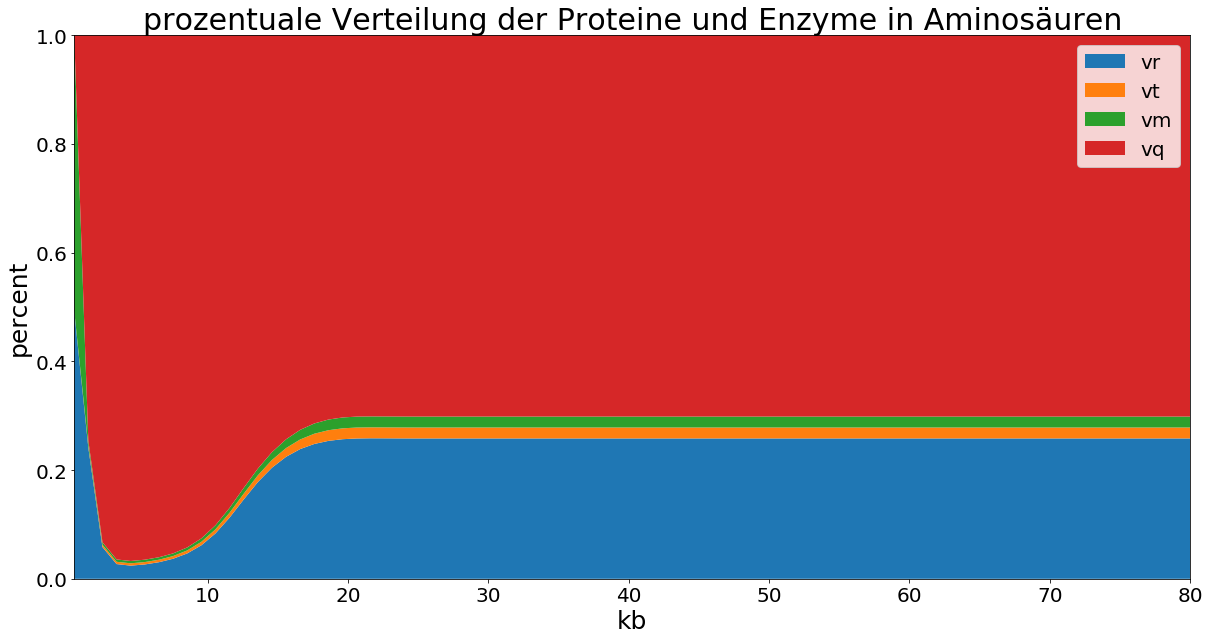

In [40]:
# Make data
data = pd.DataFrame({'group_A':vramino[0:80], 'group_B':vtamino[0:80], 'group_C':vmamino[0:80], 'group_D':vqamino[0:80]}, index=xkb[0:80])
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(xkb,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'])
plt.legend(loc='upper right',prop={'size': 20})
plt.margins(0,0)
plt.title('prozentuale Verteilung der Proteine und Enzyme in Aminosäuren', size = 30)
plt.xlabel('kb', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

[0.023714078051708446,
 0.023892458792861202,
 0.024038091185028296,
 0.024159635332852338,
 0.02426281278190851,
 0.024351592825902206,
 0.024428835045846826,
 0.024496662555364132,
 0.024556691020147018,
 0.024610175521468942,
 0.02465810822417899,
 0.024701285342517094,
 0.024740354265868427,
 0.024775847476086483,
 0.02480820744178825,
 0.024837805208295496,
 0.024864954494292383,
 0.024889922528866654,
 0.024912938486151993,
 0.024934200123918237,
 0.024953879061949923,
 0.024972125018099933,
 0.024989069236968597,
 0.025004827286989023,
 0.0250195013589061,
 0.025033182167304848,
 0.02504595053363834,
 0.025057878711834132,
 0.025069031504430496,
 0.02507946720717253,
 0.02508923841229535,
 0.025098392694739177,
 0.025106973200870835,
 0.02511501915560965,
 0.025122566300940136,
 0.02512964727647381,
 0.02513629195085721,
 0.02514252771132043,
 0.02514837971744582,
 0.02515387112423668,
 0.025159023278759393,
 0.025163855893958517,
 0.025168387202694334,
 0.02517263409459168,
 0.

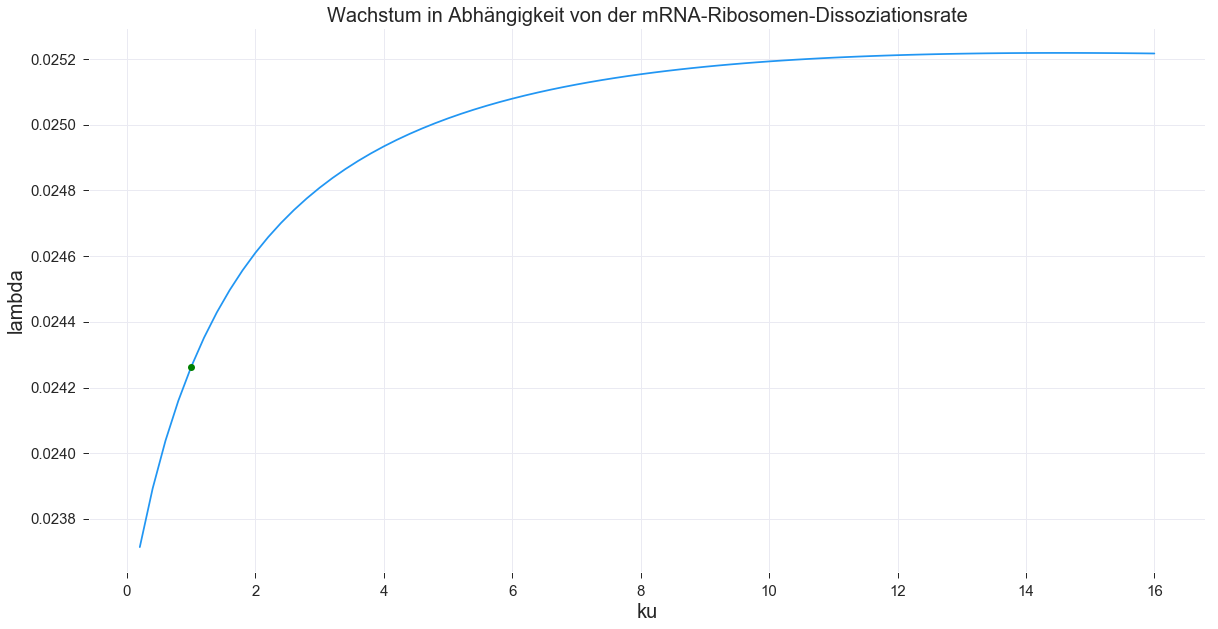

In [12]:
lambdawertku = []

m = WeisseBaseModel()
s = modelbase.Simulator(m)

i = 1
ku = 0.2

while i <= 80:
    m.par.update({'ku': ku})
    #                         ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])  
    s.timeCourse(np.linspace(0,3000,100),weise_values)
    lambdawertku.append(s.getY()[:,16][-1])
    
    i += 1
    ku += 0.2

    
modelkuwert = []
mku = WeisseBaseModel()
#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])

mku.par.update({'ku': 1})
sku = modelbase.Simulator(mku)
sku.timeCourse(np.linspace(0,3000,100),weise_values);
modelkuwert.append(sku.getY()[:,16][-1])  

    
    
    
xku = np.linspace(0.2,16,80)#[200,400,600,800,1000,1200,1400,1600]
y = lambdawertku
plt.figure(figsize=(20,10))
plt.title('Wachstum in Abhängigkeit von der mRNA-Ribosomen-Dissoziationsrate', size = 20)
plt.xlabel('ku', size = 20)
plt.ylabel('lambda', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.plot(xku,y)
plt.plot(1,modelkuwert,'og', label ='mRNA-ribosome unbinding rate in the model = 1')

lambdawertku

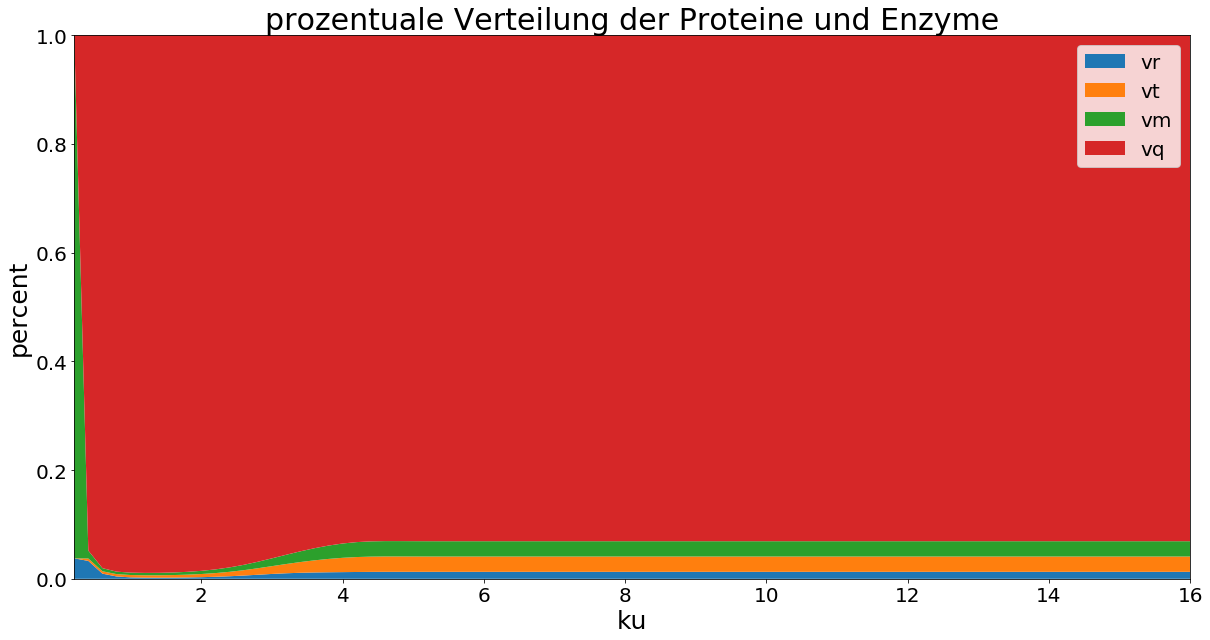

In [42]:
vr = s.getRate('vr').tolist()
vt = s.getRate('vt').tolist()
vm = s.getRate('vm').tolist()
vq = s.getRate('vq').tolist()

# Make data
data = pd.DataFrame({'group_A':vr[0:80], 'group_B':vt[0:80], 'group_C':vm[0:80], 'group_D':vq[0:80]}, index=xku[0:80])
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(xku,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'])
plt.legend(loc='upper right',prop={'size': 20})
plt.margins(0,0)
plt.title('prozentuale Verteilung der Proteine und Enzyme', size = 30)
plt.xlabel('ku', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

In [14]:
# Make data
data = pd.DataFrame({'group_A':vramino[0:80], 'group_B':vtamino[0:80], 'group_C':vmamino[0:80], 'group_D':vqamino[0:80]}, index=xku[0:80])
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(xku,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'])
plt.legend(loc='upper right',prop={'size': 20})
plt.margins(0,0)
plt.title('prozentuale Verteilung der Proteine und Enzyme in Aminosäuren', size = 30)
plt.xlabel('ku', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

NameError: name 'vramino' is not defined

[0.024186418597395756,
 0.024042135643951766,
 0.023907538168651703,
 0.02378109475424123,
 0.0236616382074809,
 0.023548254745778922,
 0.023440213093547047,
 0.023336917211710075,
 0.02323787369151401,
 0.023142668608586815,
 0.023050950684400946,
 0.022962418773604058,
 0.022876812391870102,
 0.02279390442728047,
 0.02271349544986676,
 0.022635409210828794,
 0.022559489040882705,
 0.022485594937499513,
 0.022413601186535185,
 0.022343394403103473,
 0.02227487190476553,
 0.022207940350637483,
 0.022142514595149862,
 0.02207851671647852,
 0.02201587518817904,
 0.021954524169045166,
 0.021894402891202612,
 0.02183545513032601,
 0.021777628744897685,
 0.02172087527382241,
 0.021665149583611418,
 0.02161040955787251,
 0.021556615823067428,
 0.021503731505490235,
 0.021451722015231146,
 0.021400554853551024,
 0.021350199440640417,
 0.021300626961186658,
 0.021251810225549866,
 0.02120372354466299,
 0.021156342617032645,
 0.021109644426441285,
 0.02106360714913733,
 0.021018210069460367,
 0

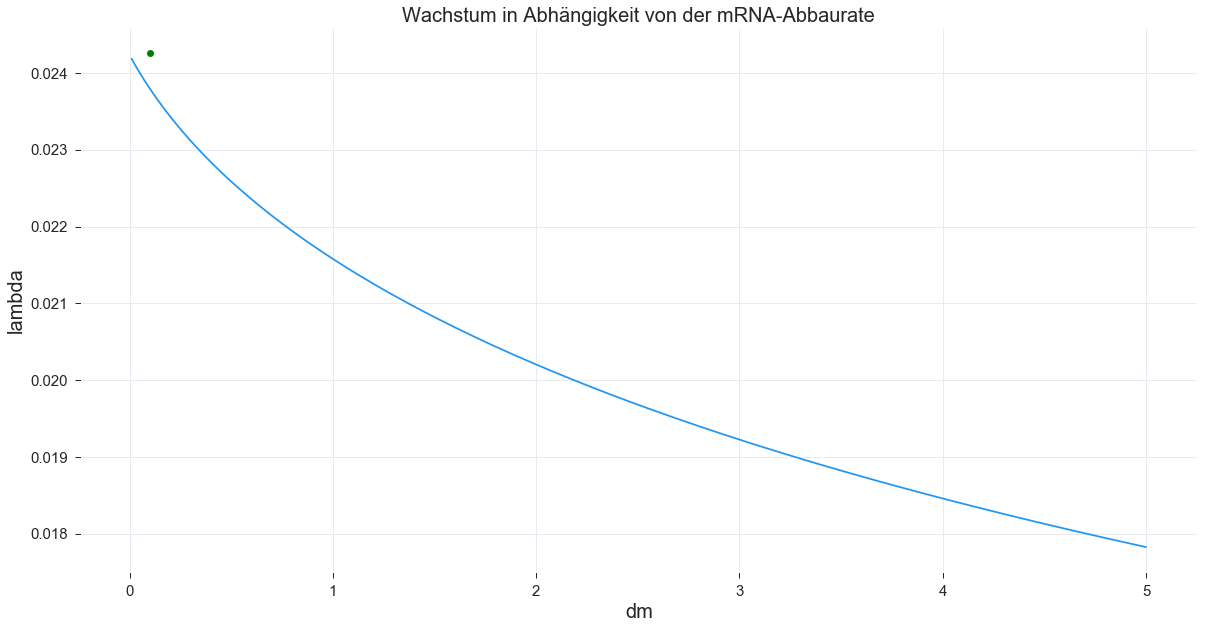

In [13]:
lambdawertdm = []

m= WeisseBaseModel()
s = modelbase.Simulator(m)

i = 1
dm = 0.2

while i <= 160:
    m.par.update({'dm': dm})
    #                         ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])  
    s.timeCourse(np.linspace(0,3000,100),weise_values)
    lambdawertdm.append(s.getY()[:,16][-1])
    
    i += 1
    dm += 0.2
    
    
modeldmwert = []
mdm = WeisseBaseModel()
#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])

mdm.par.update({'dm': 0.1})
sdm = modelbase.Simulator(mdm)
sdm.timeCourse(np.linspace(0,3000,100),weise_values);
modeldmwert.append(sdm.getY()[:,16][-1])    


    
xdm = np.linspace(0.01,5,160)#[200,400,600,800,1000,1200,1400,1600]
y = lambdawertdm
plt.figure(figsize=(20,10))
plt.title('Wachstum in Abhängigkeit von der mRNA-Abbaurate', size = 20)
plt.xlabel('dm', size = 20)
plt.ylabel('lambda', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.plot(xdm,y)
plt.plot(0.1,modeldmwert,'og', label ='mRNA-degradation rate in the model = 0.1')

lambdawertdm


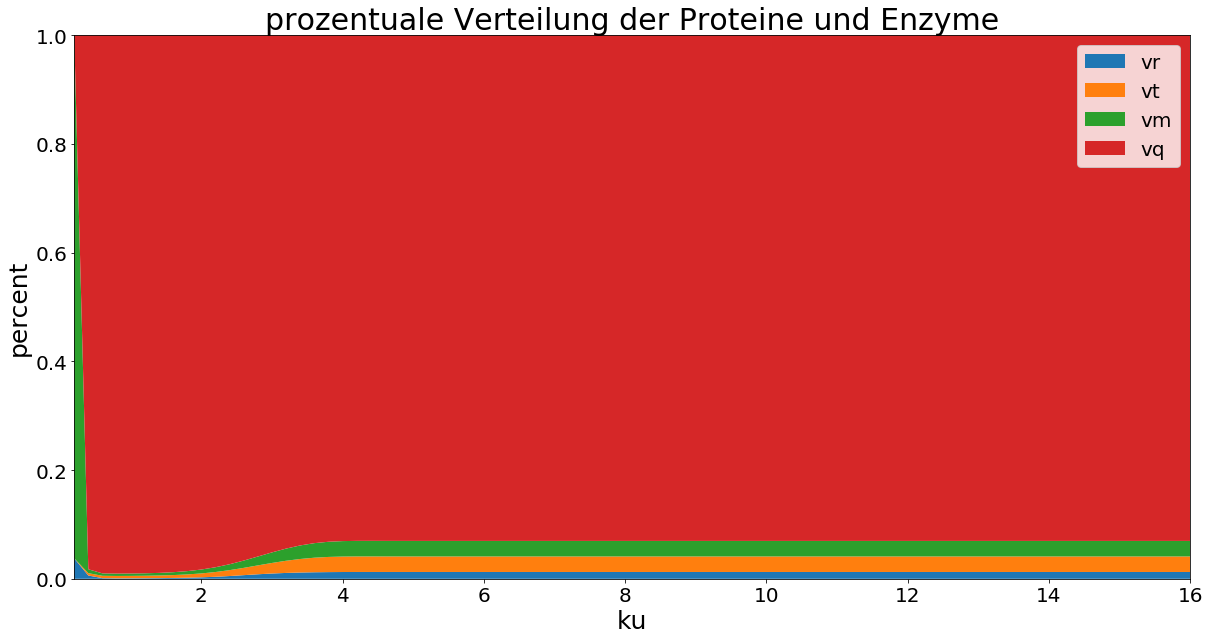

In [45]:
vr = s.getRate('vr').tolist()
vt = s.getRate('vt').tolist()
vm = s.getRate('vm').tolist()
vq = s.getRate('vq').tolist()

# Make data
data = pd.DataFrame({'group_A':vr[0:80], 'group_B':vt[0:80], 'group_C':vm[0:80], 'group_D':vq[0:80]}, index=xdm)
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(xdm,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'])
plt.legend(loc='upper right',prop={'size': 20})
plt.margins(0,0)
plt.title('prozentuale Verteilung der Proteine und Enzyme', size = 30)
plt.xlabel('ku', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

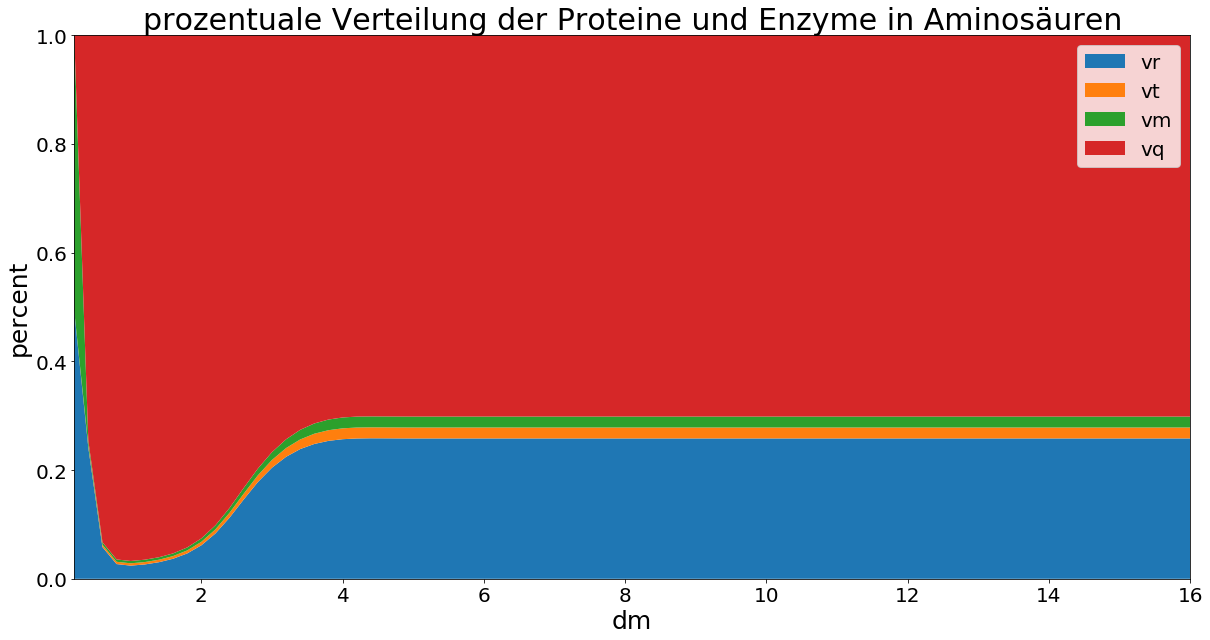

In [46]:
# Make data
data = pd.DataFrame({'group_A':vramino[0:80], 'group_B':vtamino[0:80], 'group_C':vmamino[0:80], 'group_D':vqamino[0:80]}, index=xdm[0:80])
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(xdm,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'])
plt.legend(loc='upper right',prop={'size': 20})
plt.margins(0,0)
plt.title('prozentuale Verteilung der Proteine und Enzyme in Aminosäuren', size = 30)
plt.xlabel('dm', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

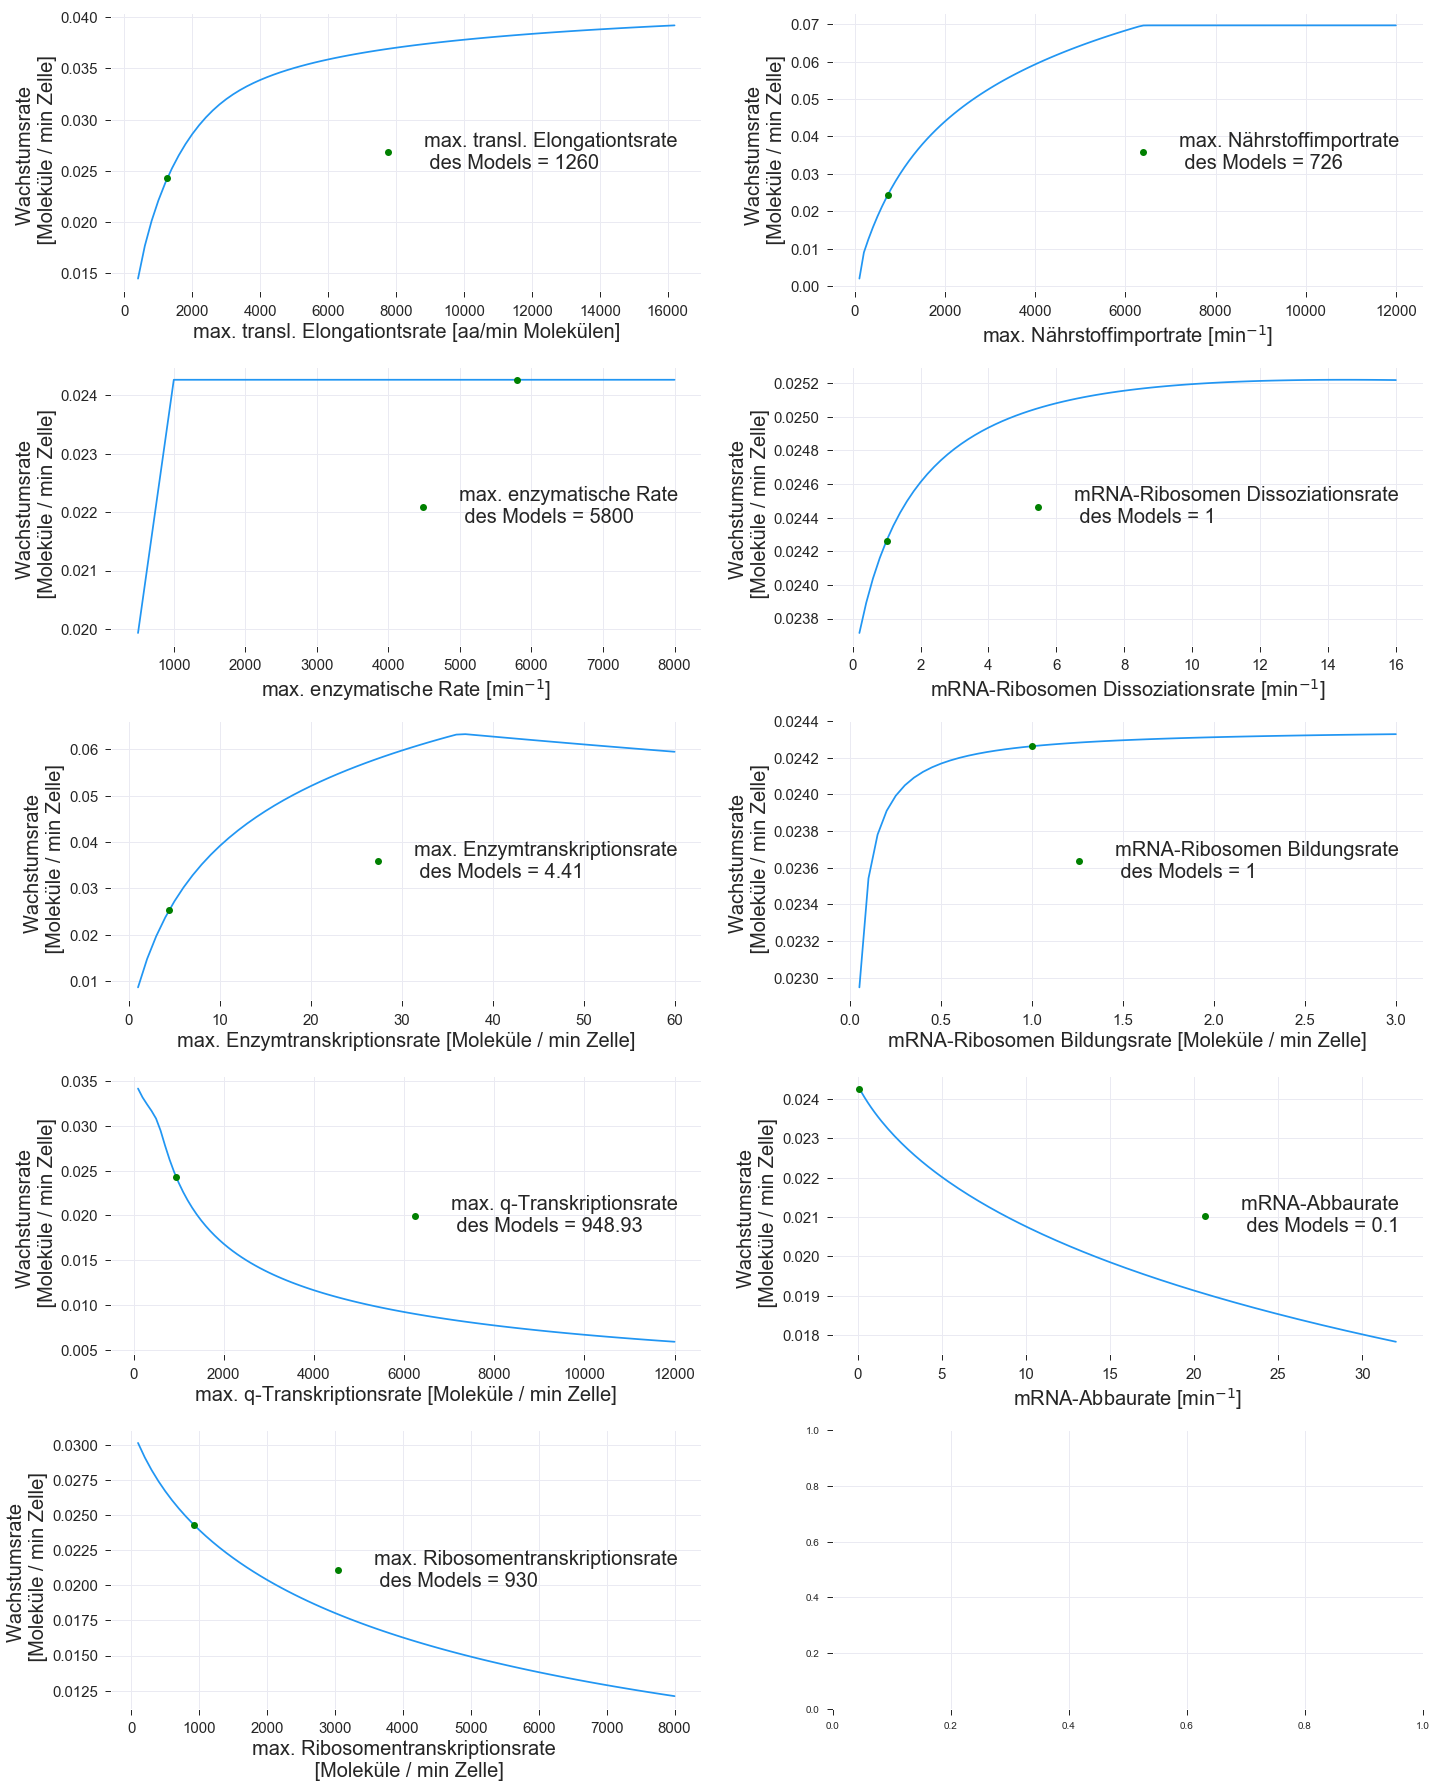

In [67]:
fig, Plotlist = plt.subplots(5,2,figsize=(20,25))

Plotlist = Plotlist.ravel()
#fig.suptitle('Wachstum in Abhängigkeit der veränderten Raten', size = 20)



xgammamax = range(400,16201,200)
y = lambdawertgammamax
#Plotlist[0].title('Wachstum in Abhängigkeit von der max. translations elongations Rate', size = 20)
Plotlist[0].set_xlabel('max. transl. Elongationtsrate [aa/min Molekülen]', size = 20)
Plotlist[0].set_ylabel('Wachstumsrate \n [Moleküle / min Zelle]', size = 20)
#Plotlist[0].set_xticks(size = 15)
#Plotlist[0].set_yticks(size = 15)
Plotlist[0].tick_params(**{'labelsize': 15})
Plotlist[0].plot(xgammamax,y)
Plotlist[0].plot(1260,modelgammamaxwert,'og', label ='max. transl. Elongationtsrate \n des Models = 1260')#'max. transl. elongation rate \n of the model = 1260')
Plotlist[0].legend(loc = 'center right', prop={'size': 20})


xvt = range(100,12001,100)#[200,400,600,800,1000,1200,1400,1600]
y = lambdawertvt
#Plotlist[1].title('Wachstum in Abhängigkeit von der max. Nährstoffimportrate', size = 20)
Plotlist[1].set_xlabel('max. Nährstoffimportrate [min$^{−1}$]', size = 20)
Plotlist[1].set_ylabel('Wachstumsrate \n [Moleküle / min Zelle]', size = 20)
#Plotlist[1].set_xticks(size = 15)
#Plotlist[1].set_yticks(size = 15)
Plotlist[1].tick_params(**{'labelsize': 15})
Plotlist[1].plot(xvt,y)
Plotlist[1].plot(726,modelvtwert,'og', label ='max. Nährstoffimportrate \n des Models = 726')#'max. nutrient import rate \n of the model = 726')
Plotlist[1].legend(loc = 'center right', prop={'size': 20})


xvm = range(500,8001,500)
y = lambdawertvm
#Plotlist[2].title('Wachstum in Abhängigkeit von der max. enzymatischen Rate', size = 20)
Plotlist[2].set_xlabel('max. enzymatische Rate [min$^{−1}$]', size = 20)
Plotlist[2].set_ylabel('Wachstumsrate \n [Moleküle / min Zelle]', size = 20)
#plt.xticks(size = 15)
#plt.yticks(size = 15)
Plotlist[2].tick_params(**{'labelsize': 15})
Plotlist[2].plot(xvm,y)
Plotlist[2].plot(5800,modelvmwert,'og', label ='max. enzymatische Rate \n des Models = 5800')#'max. enzymatic rate \n of the model = 5800')
Plotlist[2].legend(loc = 'center right', prop={'size': 20})


xku = np.linspace(0.2,16,80)#[200,400,600,800,1000,1200,1400,1600]
y = lambdawertku
#Plotlist[3].title('Wachstum in Abhängigkeit von der mRNA-Ribosomen-Dissoziationsrate', size = 20)
Plotlist[3].set_xlabel('mRNA-Ribosomen Dissoziationsrate [min$^{−1}$]', size = 20)
Plotlist[3].set_ylabel('Wachstumsrate \n [Moleküle / min Zelle]', size = 20)
#Plotlist[3].set_xticks(size = 15)
#Plotlist[3].set_yticks(size = 15)
Plotlist[3].tick_params(**{'labelsize': 15})
Plotlist[3].plot(xku,y)
Plotlist[3].plot(1,modelkuwert,'og', label = 'mRNA-Ribosomen Dissoziationsrate \n des Models = 1')#'mRNA-ribosome unbinding \n rate of the model = 1')
Plotlist[3].legend(loc = 'center right', prop={'size': 20})


xwt = range(1,61,1)
y = lambdawertwt
#Plotlist[4].title('Wachstum in Abhängigkeit von der max. Enzymtranskriptionsrate', size = 20)
Plotlist[4].set_xlabel('max. Enzymtranskriptionsrate [Moleküle / min Zelle]', size = 20)
Plotlist[4].set_ylabel('Wachstumsrate \n [Moleküle / min Zelle]', size = 20)
#Plotlist[4].set_xticks(size = 15)
#Plotlist[4].set_yticks(size = 15)
Plotlist[4].tick_params(**{'labelsize': 15})
Plotlist[4].plot(xwt,y)
Plotlist[4].plot(4.41,modelwtwert,'og', label ='max. Enzymtranskriptionsrate \n des Models = 4.41')#'max. enzyme transcription \n rate of the model = 4.41')
Plotlist[4].legend(loc = 'center right', prop={'size': 20})

xkb = np.linspace(0.05,3,60)
y = lambdawertkb
#Plotlist[5].title('Wachstum in Abhängigkeit von der mRNA-Ribosomen-Bindungsrate', size = 20)
Plotlist[5].set_xlabel('mRNA-Ribosomen Bildungsrate [Moleküle / min Zelle]', size = 20)
Plotlist[5].set_ylabel('Wachstumsrate \n [Moleküle / min Zelle]', size = 20)
#Plotlist[5].set_xticks(size = 15)
#Plotlist[5].set_yticks(size = 15)
Plotlist[5].tick_params(**{'labelsize': 15})
Plotlist[5].plot(xkb,y)
Plotlist[5].plot(1,modelkbwert,'og', label ='mRNA-Ribosomen Bildungsrate \n des Models = 1')#'mRNA-ribosome binding \n rate of the model = 1')
Plotlist[5].legend(loc = 'center right', prop={'size': 20})


xwq = range(100,12001,100)
y = lambdawertwq
#Plotlist[6].title('Wachstum in Abhängigkeit von der max. q-Transkriptionsrate', size = 20)
Plotlist[6].set_xlabel('max. q-Transkriptionsrate [Moleküle / min Zelle]', size = 20)
Plotlist[6].set_ylabel('Wachstumsrate \n [Moleküle / min Zelle]', size = 20)
#Plotlist[6].set_xticks(size = 15)
#Plotlist[6].set_yticks(size = 15)
Plotlist[6].tick_params(**{'labelsize': 15})
Plotlist[6].plot(xwq,y)
Plotlist[6].plot(948.93,modelwqwert,'og', label ='max. q-Transkriptionsrate \n des Models = 948.93')#'max. q-transcription rate \n of the model = 948.93')
Plotlist[6].legend(loc = 'center right', prop={'size': 20})


xdm = np.linspace(0.2,32,160)#[200,400,600,800,1000,1200,1400,1600]
y = lambdawertdm
#Plotlist[7].title('Wachstum in Abhängigkeit von der mRNA-Abbaurate', size = 20)
Plotlist[7].set_xlabel('mRNA-Abbaurate [min$^{−1}$]', size = 20)
Plotlist[7].set_ylabel('Wachstumsrate \n [Moleküle / min Zelle]', size = 20)
#Plotlist[7].set_xticks(size = 15)
#Plotlist[7].set_yticks(size = 15)
Plotlist[7].tick_params(**{'labelsize': 15})
Plotlist[7].plot(xdm,y)
Plotlist[7].plot(0.1,modeldmwert,'og', label ='mRNA-Abbaurate \n des Models = 0.1')#'mRNA-degradation rate \n of the model = 0.1')
Plotlist[7].legend(loc = 'center right', prop={'size': 20})

xwr = range(100,8001,100)
y = lambdawertwr
#Plotlist[8].title('Wachstum in Abhängigkeit von der max. Ribosomen-Transkriptionsrate', size = 20)
Plotlist[8].set_xlabel('max. Ribosomentranskriptionsrate \n [Moleküle / min Zelle]', size = 20)
Plotlist[8].set_ylabel('Wachstumsrate \n [Moleküle / min Zelle]', size = 20)
#Plotlist[8].set_xticks(size = 15)
#Plotlist[8].set_yticks(size = 15)
Plotlist[8].tick_params(**{'labelsize': 15})
Plotlist[8].plot(xwr,y)
Plotlist[8].plot(930,modelwrwert,'og', label ='max. Ribosomentranskriptionsrate \n des Models = 930')#'max. ribosom transcription rate \n of the model = 930')
Plotlist[8].legend(loc = 'center right', prop={'size': 20})

plt.tight_layout()

In [60]:
xgammamax = range(400,16201,200)
xgammamax
len(lambdawertgammamax)

80

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


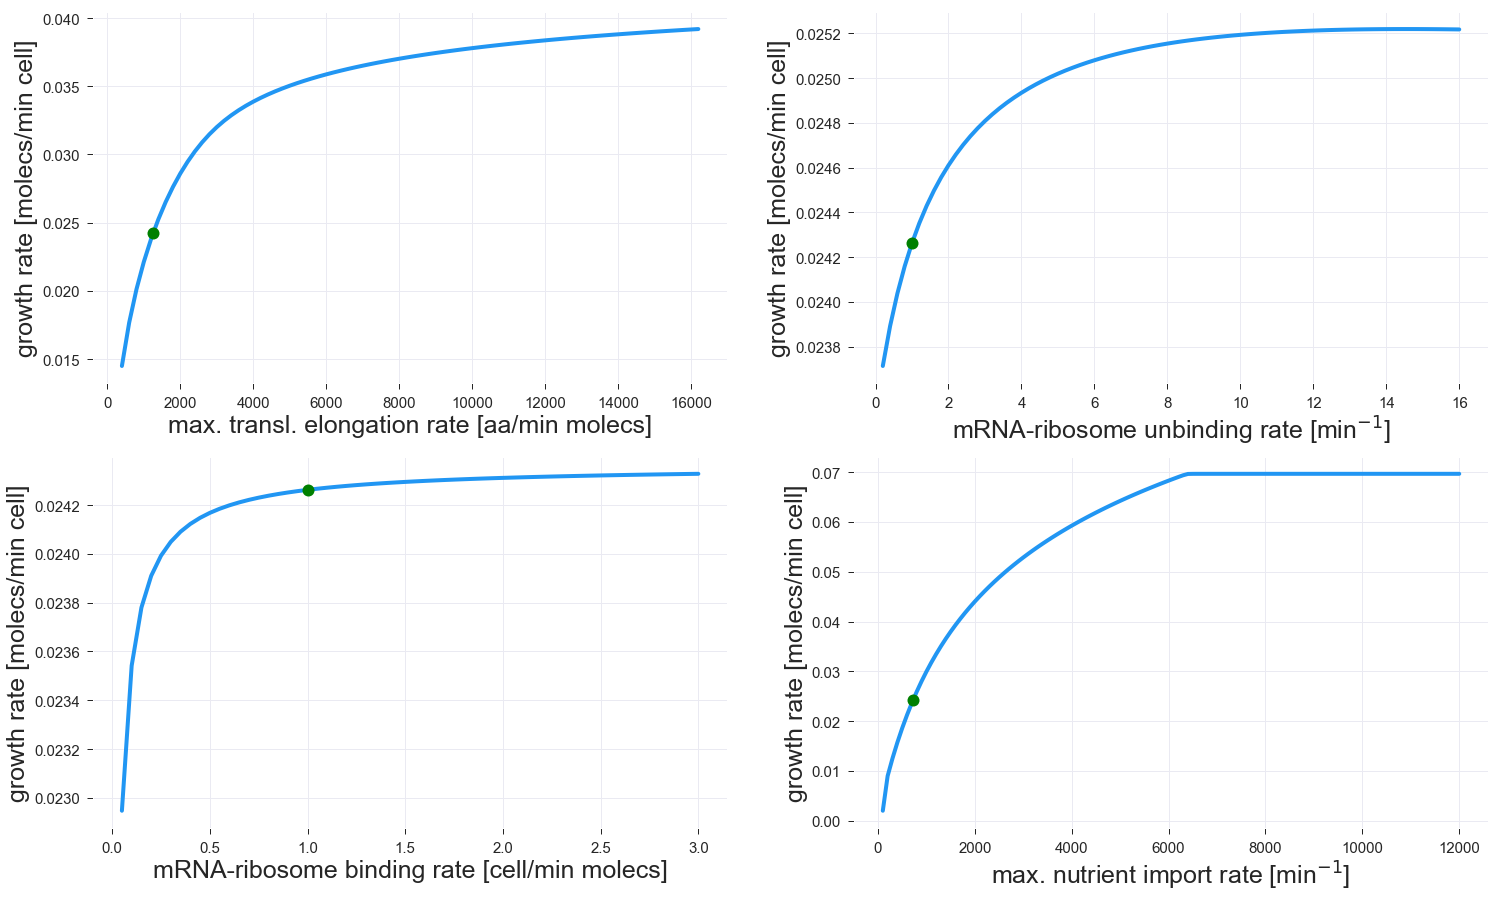

In [53]:
fig, Plotlist = plt.subplots(2,2,figsize=(25,15))
Plotlist = Plotlist.ravel()
#fig.suptitle('Wachstum in Abhängigkeit der veränderten Raten', size = 20)



xgammamax = range(400,16301,200)
y = lambdawertgammamax
#Plotlist[0].title('Wachstum in Abhängigkeit von der max. translations elongations Rate', size = 20)
Plotlist[0].set_xlabel('max. transl. elongation rate [aa/min molecs]', size = 25)
Plotlist[0].set_ylabel('growth rate [molecs/min cell]', size = 25)
Plotlist[0].tick_params(**{'labelsize': 15})
#Plotlist[0].set_xticks(size = 15)
#Plotlist[0].set_yticks(size = 15)
Plotlist[0].plot(xgammamax,y,linewidth=4)
Plotlist[0].plot(1260,modelgammamaxwert,'og',markersize=12)#, label ='1260 [aa/min molecs]')#'max. transl. Elongationtsrate \n des Models = 1260')#
Plotlist[0].legend(loc = 'center right', prop={'size': 20})


xvt = range(100,12001,100)#[200,400,600,800,1000,1200,1400,1600]
y = lambdawertvt
#Plotlist[3].title('Wachstum in Abhängigkeit von der max. Nährstoffimportrate', size = 20)
Plotlist[3].set_xlabel('max. nutrient import rate [min$^{−1}$]', size = 25)
Plotlist[3].set_ylabel('growth rate [molecs/min cell]', size = 25)
Plotlist[3].tick_params(**{'labelsize': 15})
#Plotlist[3].set_xticks(size = 15)
#Plotlist[3].set_yticks(size = 15)
Plotlist[3].plot(xvt,y,linewidth=4)
Plotlist[3].plot(726,modelvtwert,'og',markersize=12)#, label ='726 [aa/min molecs]')#'max. Nährstoffimportrate \n des Models = 726')
Plotlist[3].legend(loc = 'center right', prop={'size': 20})



xku = np.linspace(0.2,16,80)#[200,400,600,800,1000,1200,1400,1600]
y = lambdawertku
#Plotlist[1].title('Wachstum in Abhängigkeit von der mRNA-Ribosomen-Dissoziationsrate', size = 20)
Plotlist[1].set_xlabel('mRNA-ribosome unbinding rate [min$^{−1}$]', size = 25)
Plotlist[1].set_ylabel('growth rate [molecs/min cell]', size = 25)
Plotlist[1].tick_params(**{'labelsize': 15})
#Plotlist[1].set_xticks(size = 15)
#Plotlist[1].set_yticks(size = 15)
Plotlist[1].plot(xku,y,linewidth=4)
Plotlist[1].plot(1,modelkuwert,'og',markersize=12)#, label = '1 [aa/min molecs]')#'mRNA-Ribosomen Dissoziationsrate \n des Models = 1')
Plotlist[1].legend(loc = 'center right', prop={'size': 20})


xkb = np.linspace(0.05,3,60)
y = lambdawertkb
#Plotlist[2].title('Wachstum in Abhängigkeit von der mRNA-Ribosomen-Bindungsrate', size = 20)
Plotlist[2].set_xlabel('mRNA-ribosome binding rate [cell/min molecs]', size = 25)
Plotlist[2].set_ylabel('growth rate [molecs/min cell]', size = 25)
Plotlist[2].tick_params(**{'labelsize': 15})
#Plotlist[2].set_xticks(size = 15)
#Plotlist[2].set_yticks(size = 15)
Plotlist[2].plot(xkb,y,linewidth=4)
Plotlist[2].plot(1,modelkbwert,'og',markersize=12)#, label ='1 [aa/min molecs]')#'mRNA-Ribosomen Bildungsrate \n des Models = 1')
Plotlist[2].legend(loc = 'center right', prop={'size': 20})


#the value of the parameter published in the original model



No handles with labels found to put in legend.
No handles with labels found to put in legend.


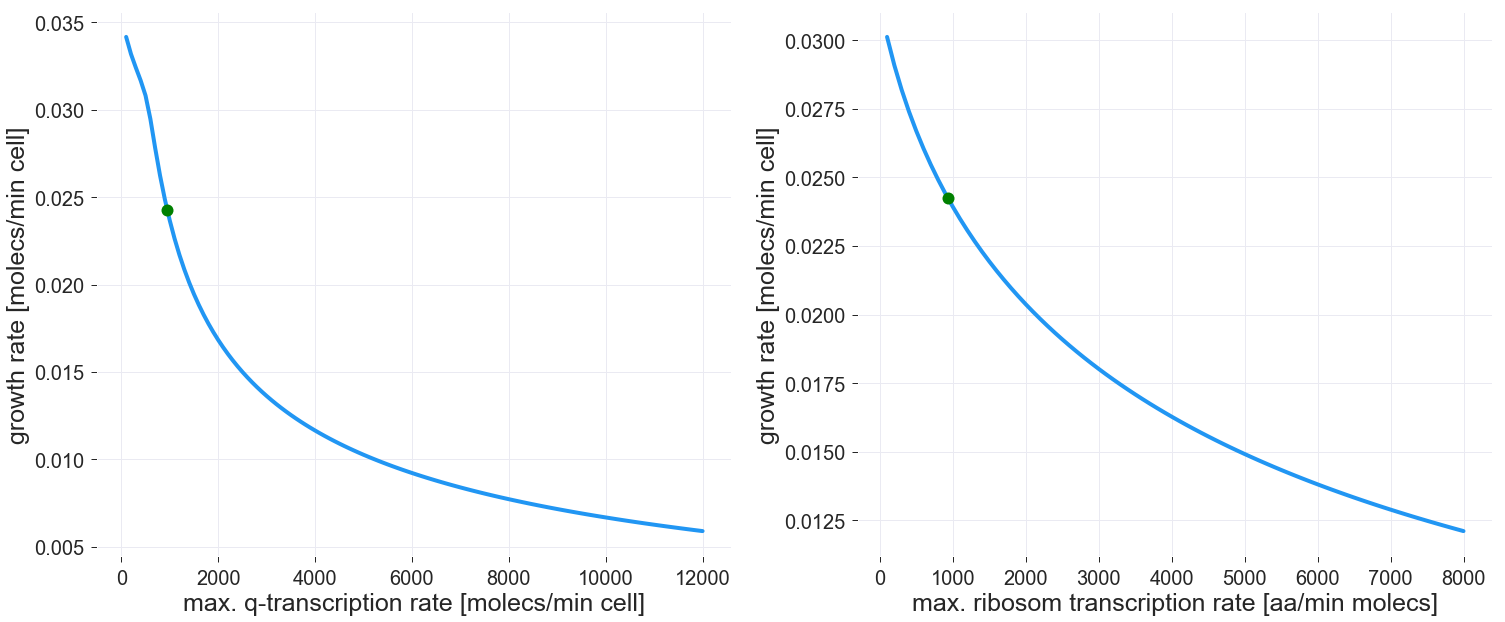

In [55]:
fig, Plotlist = plt.subplots(1,2,figsize=(25,10))
Plotlist = Plotlist.ravel()
#fig.suptitle('Wachstum in Abhängigkeit der veränderten Raten', size = 20)


xwq = range(100,12001,100)
y = lambdawertwq
#Plotlist[6].title('Wachstum in Abhängigkeit von der max. q-Transkriptionsrate', size = 20)
Plotlist[0].set_xlabel('max. q-transcription rate [molecs/min cell]', size = 25)
Plotlist[0].set_ylabel('growth rate [molecs/min cell]', size = 25)
Plotlist[0].tick_params(**{'labelsize': 20})
#Plotlist[6].set_xticks(size = 15)
#Plotlist[6].set_yticks(size = 15)
Plotlist[0].plot(xwq,y,linewidth=4)
Plotlist[0].plot(948.93,modelwqwert,'og',markersize=12)#, label ='max. q-transcription rate \n of the model = 948.93')#'max. q-Transkriptionsrate \n des Models = 948.93')
Plotlist[0].legend(loc = 'center right', prop={'size': 25})


xwr = range(100,8001,100)
y = lambdawertwr
#Plotlist[8].title('Wachstum in Abhängigkeit von der max. Ribosomen-Transkriptionsrate', size = 20)
Plotlist[1].set_xlabel('max. ribosom transcription rate [aa/min molecs]', size = 25)
Plotlist[1].set_ylabel('growth rate [molecs/min cell]', size = 25)
Plotlist[1].tick_params(**{'labelsize': 20})
#Plotlist[8].set_xticks(size = 15)
#Plotlist[8].set_yticks(size = 15)
Plotlist[1].plot(xwr,y,linewidth=4)
Plotlist[1].plot(930,modelwrwert,'og',markersize=12)#, label ='max. ribosom transcription rate \n of the model = 930')#'max. Ribosomentranskriptionsrate \n des Models = 930')
Plotlist[1].legend(loc = 'center right', prop={'size': 25})



int